In [27]:
import numpy as np
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
import rebound
import reboundx
import time
from ctypes import cdll
from scipy.integrate import quad
from scipy.special import gamma, spence
from scipy.optimize import minimize_scalar
from numba import jit
import scipy.odr as odr
from Burkert_profile_functions import *
from NFW_profile_functions import *
from Sersic_profile_functions import *
import os
import shutil

# matplotlib setup
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['figure.facecolor'] = 'white'
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=15)
plt.rc('axes', linewidth=1.5)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15, direction='in')
plt.rc('ytick', labelsize=15, direction='in')
plt.rc('xtick', top=True)
plt.rc('ytick', right=True)
plt.rc('xtick.minor', visible=True)
plt.rc('ytick.minor', visible=True)
plt.rc('xtick.major',size=10, pad=4)
plt.rc('xtick.minor',size=5, pad=4)
plt.rc('ytick.major',size=10)
plt.rc('ytick.minor',size=5)
plt.rc('legend', fontsize=15)

UGC7369_masses = np.array([ 0.5270876 ,  0.15333488,  1.08466861,  0.23894274,  0.53477108,
        0.66067185,  2.74824974, 43.7230426 ,  0.25702028,  0.68325756,
        0.48945594,  0.78176033,  0.98889862,  0.70596634,  1.74467125,
        1.42423357,  1.17664156,  0.49028781,  0.71836984,  0.42620355,
        0.33863009])

NGC4605_masses = np.array([2.798490319888382, 0.17272820745171386, 0.9355246302950031, 2.806435077847868, 2.1865372126689695, 
 1.2407313733134462, 0.4584233399638007, 0.2937634439341443, 2.563561443019776, 0.21426819543381712, 
 0.664212064963621])


UGC8638_masses = np.array([0.3409560719297101, 1.5371520691156104, 29.201961429284346])

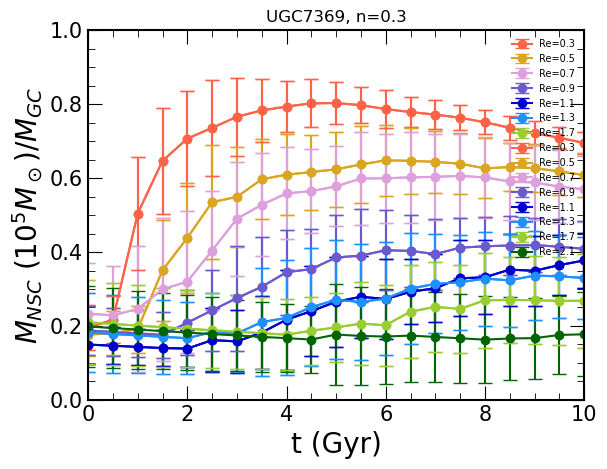

In [207]:
# NSC over time plot

##############################################
NSC_masses = np.zeros([10, 21])
GC_masses = np.zeros([10, 21])
for output_number in range(21):
    #filename = 'Sim_n_'+str(n)+'_NFW-1_'+str(output_time)+'_'+str(R_e)+'.txt'
    filename = 'Sim_n_0.3_ZoomNFW-1_'+str(output_number)+'_0.3.txt'
    data = np.genfromtxt(filename, skip_header=2)
    iterations = data[:, 0]
    masses = data[:, 1]
    for k in range(10):
        relevant_masses = masses[iterations==k]
        NSC_masses[k, output_number] = max(relevant_masses) 
        GC_masses [k, output_number] = sum(relevant_masses)
plt.errorbar(np.linspace(0, 10, 21), np.average(NSC_masses, axis=0)/np.average(GC_masses), \
             yerr=np.std(NSC_masses, axis=0)/np.average(GC_masses), color='tomato', capsize=5, marker='o', label='Re=0.3')
plt.xlim(0, 10)
plt.xlabel('t (Gyr)', fontsize=20)
plt.ylabel(r'$M_{NSC}$ ($10^5M_\odot$)', fontsize=20)



########################################################
NSC_masses = np.zeros([10, 21])
GC_masses = np.zeros([10, 21])
for output_number in range(21):
    filename = 'Sim_n_0.3_ZoomNFW-1_'+str(output_number)+'_0.5.txt'
    data = np.genfromtxt(filename, skip_header=2)
    iterations = data[:, 0]
    masses = data[:, 1]
    for k in range(10):
        relevant_masses = masses[iterations==k]
        NSC_masses[k, output_number] = max(relevant_masses) 
        GC_masses [k, output_number] = sum(relevant_masses)
plt.errorbar(np.linspace(0, 10, 21), np.average(NSC_masses, axis=0)/np.average(GC_masses), \
             yerr=np.std(NSC_masses, axis=0)/np.average(GC_masses), color='goldenrod', capsize=5, marker='o', label='Re=0.5')


###########################################################
NSC_masses = np.zeros([10, 21])
GC_masses = np.zeros([10, 21])
for output_number in range(21):
    
    filename = 'Sim_n_0.3_ZoomNFW-1_'+str(output_number)+'_0.7.txt'
    data = np.genfromtxt(filename, skip_header=2)
    iterations = data[:, 0]
    masses = data[:, 1]
    for k in range(10):
        relevant_masses = masses[iterations==k]
        NSC_masses[k, output_number] = max(relevant_masses) 
        GC_masses [k, output_number] = sum(relevant_masses)
plt.errorbar(np.linspace(0, 10, 21), np.average(NSC_masses, axis=0)/np.average(GC_masses), \
             yerr=np.std(NSC_masses, axis=0)/np.average(GC_masses), color='plum', capsize=5, marker='o', label='Re=0.7')
plt.xlim(0, 10)
plt.xlabel('t (Gyr)', fontsize=20)
plt.ylabel(r'$M_{NSC}$ ($10^5M_\odot$)', fontsize=20)


################################################################
NSC_masses = np.zeros([10, 21])
GC_masses = np.zeros([10, 21])
for output_number in range(21):
    filename = 'Sim_n_0.3_ZoomNFW-1_'+str(output_number)+'_0.9.txt'
    data = np.genfromtxt(filename, skip_header=2)
    iterations = data[:, 0]
    masses = data[:, 1]
    for k in range(10):
        relevant_masses = masses[iterations==k]
        NSC_masses[k, output_number] = max(relevant_masses) 
        GC_masses [k, output_number] = sum(relevant_masses)
plt.errorbar(np.linspace(0, 10, 21), np.average(NSC_masses, axis=0)/np.average(GC_masses), \
             yerr=np.std(NSC_masses, axis=0)/np.average(GC_masses), color='slateblue', capsize=5, marker='o', label='Re=0.9')



############################################################################
NS
[207]:
C_masses = np.zeros([10, 21])
GC_masses = np.zeros([10, 21])
for output_number in range(21):
    filename = 'Sim_n_0.3_ZoomNFW-1_'+str(output_number)+'_1.1.txt'
    data = np.genfromtxt(filename, skip_header=2)
    iterations = data[:, 0]
    masses = data[:, 1]
    for k in range(10):
        relevant_masses = masses[iterations==k]
        NSC_masses[k, output_number] = max(relevant_masses) 
        GC_masses [k, output_number] = sum(relevant_masses)
plt.errorbar(np.linspace(0, 10, 21), np.average(NSC_masses, axis=0)/np.average(GC_masses), \
             yerr=np.std(NSC_masses, axis=0)/np.average(GC_masses), color='mediumblue', capsize=5, marker='o', label='Re=1.1')

#########################################################################
NSC_masses = np.zeros([10, 21])
GC_masses = np.zeros([10, 21])
for output_number in range(21):
    filename = 'Sim_n_0.3_ZoomNFW-1_'+str(output_number)+'_1.3.txt'
    data = np.genfromtxt(filename, skip_header=2)
    iterations = data[:, 0]
    masses = data[:, 1]
    for k in range(10):
        relevant_masses = masses[iterations==k]
        NSC_masses[k, output_number] = max(relevant_masses) 
        GC_masses [k, output_number] = sum(relevant_masses)
plt.errorbar(np.linspace(0, 10, 21), np.average(NSC_masses, axis=0)/np.average(GC_masses), \
             yerr=np.std(NSC_masses, axis=0)/np.average(GC_masses), color='dodgerblue', capsize=5, marker='o', label='Re=1.3')

###################################################################
NSC_masses = np.zeros([10, 21])
GC_masses = np.zeros([10, 21])
for output_number in range(21):
    filename = 'Sim_n_0.3_ZoomNFW-1_'+str(output_number)+'_1.7.txt'
    data = np.genfromtxt(filename, skip_header=2)
    iterations = data[:, 0]
    masses = data[:, 1]
    for k in range(10):
        relevant_masses = masses[iterations==k]
        NSC_masses[k, output_number] = max(relevant_masses) 
        GC_masses [k, output_number] = sum(relevant_masses)
plt.errorbar(np.linspace(0, 10, 21), np.average(NSC_masses, axis=0)/np.average(GC_masses), \
             yerr=np.std(NSC_masses, axis=0)/np.average(GC_masses), color='yellowgreen', capsize=5, marker='o', label='Re=1.7')


###################################################################
NSC_masses = np.zeros([10, 21])
GC_masses = np.zeros([10, 21])
for output_number in range(21):
    filename = 'Sim_n_0.3_ZoomNFW-1_'+str(output_number)+'_2.1.txt'
    data = np.genfromtxt(filename, skip_header=2)
    iterations = data[:, 0]
    masses = data[:, 1]
    for k in range(10):
        relevant_masses = masses[iterations==k]
        NSC_masses[k, output_number] = max(relevant_masses) 
        GC_masses [k, output_number] = sum(relevant_masses)  
plt.errorbar(np.linspace(0, 10, 21), np.average(NSC_masses, axis=0)/np.average(GC_masses), \
             yerr=np.std(NSC_masses, axis=0)/np.average(GC_masses), color='darkgreen', capsize=5, marker='o', label='Re=2.1')




plt.xlim(0, 10)
plt.xlabel('t (Gyr)', fontsize=20)
plt.ylabel(r'$M_{NSC}$ ($10^5M_\odot$)/$M_{GC}$', fontsize=20)
plt.ylim(0, 1)
plt.title ('UGC7369, n=0.3')
plt.legend(loc='upper right', frameon=False, fontsize=7)
plt.show()

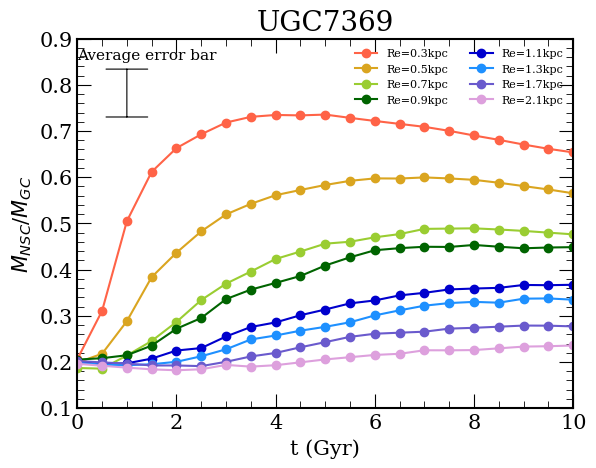

In [26]:
# NSC over time plot - averaged over n

sim_run = 1
if sim_run == 1:
    galaxy = 'UGC7369'
elif sim_run == 2:
    galaxy = 'UGC8638'
else:
    galaxy = 'NGC4605'


###################################################################
n_values = [0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 1.9, 2.1]
all_NSC_masses = np.zeros([len(n_values), 21])
all_GC_masses = np.zeros([len(n_values), 21])
for i in range (len(n_values)):
    n = n_values[i]
    NSC_masses = np.zeros([10, 21])
    GC_masses = np.zeros([10, 21])
    for output_number in range(21):
        filename = 'Sim_n_'+str(n)+'_ZoomNFW-'+str(sim_run)+'_'+str(output_number)+'_0.3.txt'
        data = np.genfromtxt(filename, skip_header=2)
        iterations = data[:, 0]
        masses = data[:, 1]
        for k in range(10):
            relevant_masses = masses[iterations==k]
            NSC_masses[k, output_number] = max(relevant_masses) 
            GC_masses [k, output_number] = sum(relevant_masses)
    avg_it_NSC_masses = np.average(NSC_masses, axis=0)
    avg_it_GC_masses = np.average(GC_masses, axis=0)
            
    all_NSC_masses[i] = (avg_it_NSC_masses)
    all_GC_masses[i] = (avg_it_GC_masses)

avg_n_NSC_masses = []  
avg_n_GC_masses = []
for i in range(21):
    avg_n_NSC_masses.append (np.average(all_NSC_masses[:, i]))
    avg_n_GC_masses.append (np.average(all_GC_masses[:, i]))

#plt.errorbar(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses), \
             #yerr=np.std(all_NSC_masses, axis=0)/np.average(avg_n_GC_masses), color='tomato', capsize=5, marker='o', label='Re=0.3')
plt.plot(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses), color='tomato', label ='Re=0.3kpc', marker='o')
#plt.fill_between(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses)-np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses), \
                 #avg_n_NSC_masses/np.average(avg_n_GC_masses)+np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses), \
                 #color='tomato', alpha=0.1)    
error_bars=[]
all_error_bars=[]
all_error_bars=[np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses)]
error_bars.append(all_error_bars[0][2])

###################################################################
n_values = [0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 1.9, 2.1]
all_NSC_masses = np.zeros([len(n_values), 21])
all_GC_masses = np.zeros([len(n_values), 21])
for i in range (len(n_values)):
    n = n_values[i]
    NSC_masses = np.zeros([10, 21])
    GC_masses = np.zeros([10, 21])
    for output_number in range(21):
        filename = 'Sim_n_'+str(n)+'_ZoomNFW-'+str(sim_run)+'_'+str(output_number)+'_0.5.txt'
        data = np.genfromtxt(filename, skip_header=2)
        iterations = data[:, 0]
        masses = data[:, 1]
        for k in range(10):
            relevant_masses = masses[iterations==k]
            NSC_masses[k, output_number] = max(relevant_masses) 
            GC_masses [k, output_number] = sum(relevant_masses)
    avg_it_NSC_masses = np.average(NSC_masses, axis=0)
    avg_it_GC_masses = np.average(GC_masses, axis=0)
            
    all_NSC_masses[i] = (avg_it_NSC_masses)
    all_GC_masses[i] = (avg_it_GC_masses)

avg_n_NSC_masses = []  
avg_n_GC_masses = []
for i in range(21):
    avg_n_NSC_masses.append (np.average(all_NSC_masses[:, i]))
    avg_n_GC_masses.append (np.average(all_GC_masses[:, i]))
        
#plt.errorbar(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses), \
             #yerr=np.std(all_NSC_masses, axis=0)/np.average(avg_n_GC_masses), color='goldenrod', capsize=5, marker='o', label='Re=0.5')
plt.plot(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses), color='goldenrod', label ='Re=0.5kpc', marker='o')
#plt.fill_between(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses)-np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses), \
                 #avg_n_NSC_masses/np.average(avg_n_GC_masses)+np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses), \
                 #color='goldenrod', alpha=0.1)
all_error_bars=[]
all_error_bars=[np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses)]
error_bars.append(all_error_bars[0][2])

###########################################################
###################################################################
n_values = [0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 1.9, 2.1]
all_NSC_masses = np.zeros([len(n_values), 21])
all_GC_masses = np.zeros([len(n_values), 21])
for i in range (len(n_values)):
    n = n_values[i]
    NSC_masses = np.zeros([10, 21])
    GC_masses = np.zeros([10, 21])
    for output_number in range(21):
        filename = 'Sim_n_'+str(n)+'_ZoomNFW-'+str(sim_run)+'_'+str(output_number)+'_0.7.txt'
        data = np.genfromtxt(filename, skip_header=2)
        iterations = data[:, 0]
        masses = data[:, 1]
        for k in range(10):
            relevant_masses = masses[iterations==k]
            NSC_masses[k, output_number] = max(relevant_masses) 
            GC_masses [k, output_number] = sum(relevant_masses)
    avg_it_NSC_masses = np.average(NSC_masses, axis=0)
    avg_it_GC_masses = np.average(GC_masses, axis=0)
            
    all_NSC_masses[i] = (avg_it_NSC_masses)
    all_GC_masses[i] = (avg_it_GC_masses)

avg_n_NSC_masses = []  
avg_n_GC_masses = []
for i in range(21):
    avg_n_NSC_masses.append (np.average(all_NSC_masses[:, i]))
    avg_n_GC_masses.append (np.average(all_GC_masses[:, i]))
        
#plt.errorbar(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses), \
             #yerr=np.std(all_NSC_masses, axis=0)/np.average(avg_n_GC_masses), color='yellowgreen', capsize=5, marker='o', label='Re=0.7')
plt.plot(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses), color='yellowgreen', label ='Re=0.7kpc', marker='o')
#plt.fill_between(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses)-np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses), \
                 #avg_n_NSC_masses/np.average(avg_n_GC_masses)+np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses), \
                 #color='yellowgreen', alpha=0.1)
    
all_error_bars=[]
all_error_bars=[np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses)]
error_bars.append(all_error_bars[0][2])

###################################################################
n_values = [0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 1.9, 2.1]
all_NSC_masses = np.zeros([len(n_values), 21])
all_GC_masses = np.zeros([len(n_values), 21])
for i in range (len(n_values)):
    n = n_values[i]
    NSC_masses = np.zeros([10, 21])
    GC_masses = np.zeros([10, 21])
    for output_number in range(21):
        filename = 'Sim_n_'+str(n)+'_ZoomNFW-'+str(sim_run)+'_'+str(output_number)+'_0.9.txt'
        data = np.genfromtxt(filename, skip_header=2)
        iterations = data[:, 0]
        masses = data[:, 1]
        for k in range(10):
            relevant_masses = masses[iterations==k]
            NSC_masses[k, output_number] = max(relevant_masses) 
            GC_masses [k, output_number] = sum(relevant_masses)
    avg_it_NSC_masses = np.average(NSC_masses, axis=0)
    avg_it_GC_masses = np.average(GC_masses, axis=0)
            
    all_NSC_masses[i] = (avg_it_NSC_masses)
    all_GC_masses[i] = (avg_it_GC_masses)

avg_n_NSC_masses = []  
avg_n_GC_masses = []
for i in range(21):
    avg_n_NSC_masses.append (np.average(all_NSC_masses[:, i]))
    avg_n_GC_masses.append (np.average(all_GC_masses[:, i]))
        
#plt.errorbar(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses), \
             #yerr=np.std(all_NSC_masses, axis=0)/np.average(avg_n_GC_masses), color='darkgreen', capsize=5, marker='o', label='Re=0.9')
plt.plot(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses), color='darkgreen', label ='Re=0.9kpc', marker='o')
#plt.fill_between(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses)-np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses), \
                 #avg_n_NSC_masses/np.average(avg_n_GC_masses)+np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses), \
                 #color='darkgreen', alpha=0.1)
all_error_bars=[]
all_error_bars=[np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses)]
error_bars.append(all_error_bars[0][2])

###################################################################
n_values = [0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 1.9, 2.1]
all_NSC_masses = np.zeros([len(n_values), 21])
all_GC_masses = np.zeros([len(n_values), 21])
for i in range (len(n_values)):
    n = n_values[i]
    NSC_masses = np.zeros([10, 21])
    GC_masses = np.zeros([10, 21])
    for output_number in range(21):
        filename = 'Sim_n_'+str(n)+'_ZoomNFW-'+str(sim_run)+'_'+str(output_number)+'_1.1.txt'
        data = np.genfromtxt(filename, skip_header=2)
        iterations = data[:, 0]
        masses = data[:, 1]
        for k in range(10):
            relevant_masses = masses[iterations==k]
            NSC_masses[k, output_number] = max(relevant_masses) 
            GC_masses [k, output_number] = sum(relevant_masses)
    avg_it_NSC_masses = np.average(NSC_masses, axis=0)
    avg_it_GC_masses = np.average(GC_masses, axis=0)
            
    all_NSC_masses[i] = (avg_it_NSC_masses)
    all_GC_masses[i] = (avg_it_GC_masses)

avg_n_NSC_masses = []
avg_n_GC_masses = []
for i in range(21):
    avg_n_NSC_masses.append (np.average(all_NSC_masses[:, i]))
    avg_n_GC_masses.append (np.average(all_GC_masses[:, i]))
        
#plt.errorbar(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses), \
             #yerr=np.std(all_NSC_masses, axis=0)/np.average(avg_n_GC_masses), color='mediumblue', capsize=5, marker='o', label='Re=1.1')
plt.plot(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses), color='mediumblue', label ='Re=1.1kpc', marker='o')
#plt.fill_between(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses)-np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses), \
                 #avg_n_NSC_masses/np.average(avg_n_GC_masses)+np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses), \
                 #color='mediumblue', alpha=0.1)
all_error_bars=[]
all_error_bars=[np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses)]
error_bars.append(all_error_bars[0][2])

###################################################################
n_values = [0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 1.9, 2.1]
all_NSC_masses = np.zeros([len(n_values), 21])
all_GC_masses = np.zeros([len(n_values), 21])
for i in range (len(n_values)):
    n = n_values[i]
    NSC_masses = np.zeros([10, 21])
    GC_masses = np.zeros([10, 21])
    for output_number in range(21):
        filename = 'Sim_n_'+str(n)+'_ZoomNFW-'+str(sim_run)+'_'+str(output_number)+'_1.3.txt'
        data = np.genfromtxt(filename, skip_header=2)
        iterations = data[:, 0]
        masses = data[:, 1]
        for k in range(10):
            relevant_masses = masses[iterations==k]
            NSC_masses[k, output_number] = max(relevant_masses) 
            GC_masses [k, output_number] = sum(relevant_masses)
    avg_it_NSC_masses = np.average(NSC_masses, axis=0)
    avg_it_GC_masses = np.average(GC_masses, axis=0)
            
    all_NSC_masses[i] = (avg_it_NSC_masses)
    all_GC_masses[i] = (avg_it_GC_masses)

avg_n_NSC_masses = []  
avg_n_GC_masses = []
for i in range(21):
    avg_n_NSC_masses.append (np.average(all_NSC_masses[:, i]))
    avg_n_GC_masses.append (np.average(all_GC_masses[:, i]))
        
#plt.errorbar(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses), \
             #yerr=np.std(all_NSC_masses, axis=0)/np.average(avg_n_GC_masses), color='dodgerblue', capsize=5, marker='o', label='Re=1.3')
plt.plot(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses), color='dodgerblue', label ='Re=1.3kpc', marker='o')
#plt.fill_between(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses)-np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses), \
                 #avg_n_NSC_masses/np.average(avg_n_GC_masses)+np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses), \
                 #color='dodgerblue', alpha=0.1)
all_error_bars=[]
all_error_bars=[np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses)]
error_bars.append(all_error_bars[0][2])

###################################################################
n_values = [0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 1.9, 2.1]
all_NSC_masses = np.zeros([len(n_values), 21])
all_GC_masses = np.zeros([len(n_values), 21])
for i in range (len(n_values)):
    n = n_values[i]
    NSC_masses = np.zeros([10, 21])
    GC_masses = np.zeros([10, 21])
    for output_number in range(21):
        filename = 'Sim_n_'+str(n)+'_ZoomNFW-'+str(sim_run)+'_'+str(output_number)+'_1.7.txt'
        data = np.genfromtxt(filename, skip_header=2)
        iterations = data[:, 0]
        masses = data[:, 1]
        for k in range(10):
            relevant_masses = masses[iterations==k]
            NSC_masses[k, output_number] = max(relevant_masses) 
            GC_masses [k, output_number] = sum(relevant_masses)
    avg_it_NSC_masses = np.average(NSC_masses, axis=0)
    avg_it_GC_masses = np.average(GC_masses, axis=0)
            
    all_NSC_masses[i] = (avg_it_NSC_masses)
    all_GC_masses[i] = (avg_it_GC_masses)

avg_n_NSC_masses = []    
avg_n_GC_masses = []
for i in range(21):
    avg_n_NSC_masses.append (np.average(all_NSC_masses[:, i]))
    avg_n_GC_masses.append (np.average(all_GC_masses[:, i]))
        
#plt.errorbar(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses), \
             #yerr=np.std(all_NSC_masses, axis=0)/np.average(avg_n_GC_masses), color='slateblue', capsize=5, marker='o', label='Re=1.7')
plt.plot(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses), color='slateblue', label ='Re=1.7kpc', marker='o')
#plt.fill_between(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses)-np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses), \
                 #avg_n_NSC_masses/np.average(avg_n_GC_masses)+np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses), \
                 #color='slateblue', alpha=0.1)
all_error_bars=[]
all_error_bars=[np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses)]
error_bars.append(all_error_bars[0][2])

###################################################################
n_values = [0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 1.9, 2.1]
all_NSC_masses = np.zeros([len(n_values), 21])
all_GC_masses = np.zeros([len(n_values), 21])
for i in range (len(n_values)):
    n = n_values[i]
    NSC_masses = np.zeros([10, 21])
    GC_masses = np.zeros([10, 21])
    for output_number in range(21):
        filename = 'Sim_n_'+str(n)+'_ZoomNFW-'+str(sim_run)+'_'+str(output_number)+'_2.1.txt'
        data = np.genfromtxt(filename, skip_header=2)
        iterations = data[:, 0]
        masses = data[:, 1]
        for k in range(10):
            relevant_masses = masses[iterations==k]
            NSC_masses[k, output_number] = max(relevant_masses) 
            GC_masses [k, output_number] = sum(relevant_masses)
    avg_it_NSC_masses = np.average(NSC_masses, axis=0)
    avg_it_GC_masses = np.average(GC_masses, axis=0)
            
    all_NSC_masses[i] = (avg_it_NSC_masses)
    all_GC_masses[i] = (avg_it_GC_masses)

avg_n_NSC_masses = [] 
avg_n_GC_masses = []
for i in range(21):
    avg_n_NSC_masses.append (np.average(all_NSC_masses[:, i]))
    avg_n_GC_masses.append (np.average(all_GC_masses[:, i]))
        

#plt.errorbar(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses), \
             #yerr=np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses), color='plum', capsize=5, marker='o', label='Re=2.1')
plt.plot(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses), color='plum', label ='Re=2.1kpc', marker='o')
#plt.fill_between(np.linspace(0, 10, 21), avg_n_NSC_masses/np.average(avg_n_GC_masses)-np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses), \
                 #avg_n_NSC_masses/np.average(avg_n_GC_masses)+np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses), \
                 #color='plum', alpha=0.1)

##error bar
all_error_bars=[]
all_error_bars=[np.std(NSC_masses, axis=0)/np.average(avg_n_GC_masses)]
error_bars.append(all_error_bars[0][2])
x_start, y_start = 1, 0.84
y_length = np.average(error_bars)
plt.annotate('', xy=(x_start, y_start-y_length), xytext=(x_start, y_start),
             arrowprops=dict(arrowstyle='|-|', color='black', lw=0.8))
plt.annotate("Average error bar", xy=(x_start+0.4, y_start+0.00001), xytext=(0, 5),
             textcoords='offset points', ha='center', fontsize=11)



plt.xlim(0, 10)
plt.xlabel('t (Gyr)', fontsize=15)
plt.ylabel(r'$M_{NSC}$/$M_{GC}$', fontsize=15)
plt.ylim(0.1, 0.9)
plt.title (galaxy, fontsize = 20)
plt.legend(loc='upper right', frameon=False, fontsize=8, ncol=2)
plt.savefig('NSC_formation_plot.png', dpi=300)
plt.show()

point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist


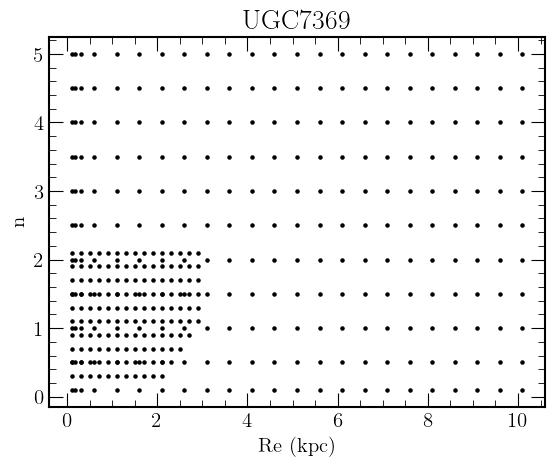

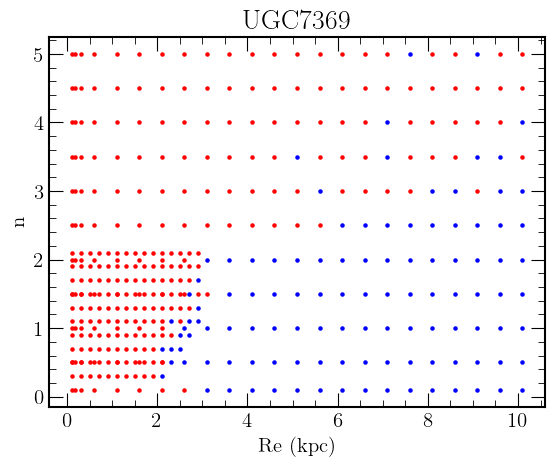

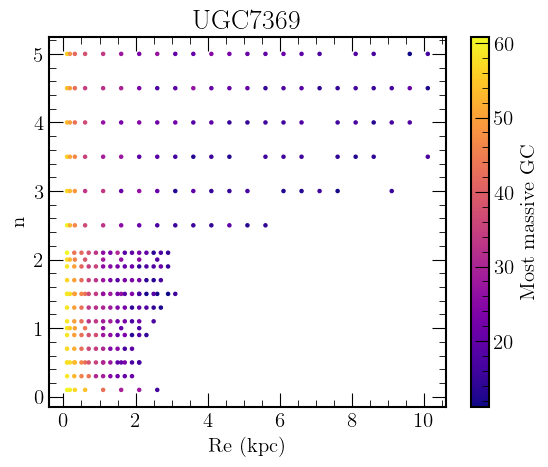

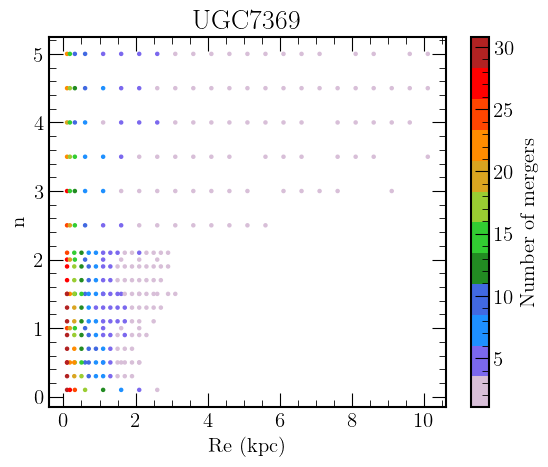

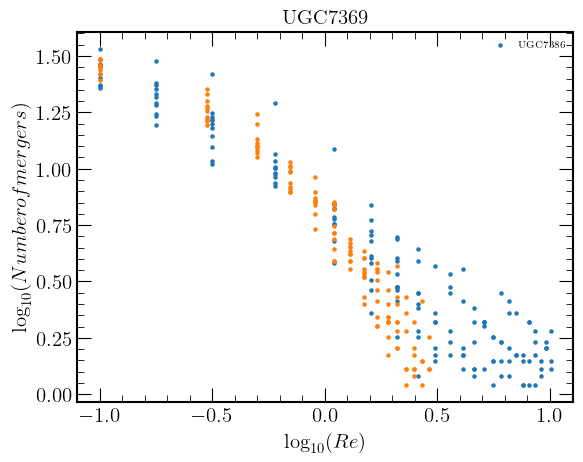

In [33]:
import statistics

no_merger_Re = []
no_merger_n = []
max_no_merger_masses = []
merger_Re = []
merger_n = []
max_merger_masses = []
merger_num = []
merger_num_plot = []

stand_dev_masses = []
number_of_mergers = []
all_Re = []
all_n = []

sim_run = 1
if sim_run == 1:
    galaxy = 'UGC7369'
elif sim_run == 2:
    galaxy = 'UGC8638'
else:
    galaxy = 'NGC4605'

# #NFW 1 values
n_values = [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
Re_values = [0.1, 0.178, 0.316, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1, 6.6, 7.1, 7.6, 8.1, 8.6, 9.1, 9.6, 10.1]

#NFW2 values
#n_values = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
#Re_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0]

#NFW3 values
#n_values = [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
#Re_values = [0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1]


for i in range(len(n_values)):
    n = n_values[i]
    for j in range (len(Re_values)):
        R_e = Re_values[j]
        data_initial = np.genfromtxt('Sim_n_'+str(n)+'_NFW-'+str(sim_run)+'_0'+'_'+str(R_e)+'.txt', skip_header=2)
        data_final = np.genfromtxt('Sim_n_'+str(n)+'_NFW-'+str(sim_run)+'_20'+'_'+str(R_e)+'.txt', skip_header=2)

        iteration_initial = data_initial [:, 0]
        iteration_final = data_final [:, 0]
        all_masses_initial = data_initial [:, 1]     #all initial masses from every iteration for a certain combination of Re and n
        all_masses_final = data_final [:, 1]

        t = 0
        initial_masses = []
        initial_num_masses = []
        while t<10: #number of iteration 
            for k in range (len(iteration_initial)):
                  if iteration_initial[k] == t:
                        initial_masses.append (all_masses_initial[k])   #all initial masses from iteration t, clears at the end of every t value
            initial_num_masses.append(len(initial_masses)) #number of masses for iteration t
            initial_masses = []
            t = t+1


        t = 0
        final_masses = []
        final_num_masses = []
        max_masses = []
        while t<10:
            for k in range (len(iteration_final)):
                if iteration_final[k] == t:
                    final_masses.append (all_masses_final[k])   
            final_num_masses.append(len(final_masses))
            max_masses.append(max(final_masses))
            final_masses = []
            t = t+1

        max_mass = sum(max_masses)/len(max_masses)
        num_mergers = []
        for i in range (10):
            num_mergers.append (initial_num_masses[i] - final_num_masses[i])
        avg_num_mergers = sum(num_mergers)/len(num_mergers)

        median_num_mergers = statistics.median(num_mergers)
        median_max_mass = statistics.median(max_masses)
        stand_dev_num = np.std(num_mergers)
        stand_dev_mass = np.std(max_masses)
        stand_dev_masses.append (stand_dev_mass)

        #f.write (str(R_e)+ ' ' +str(n)+ ' ' +str(avg_num_mergers)+' ' +str(max_mass)+ ' ' +str(median_num_mergers)+ ' ' +str(median_max_mass)+ ' '+str(stand_dev_num)+' '+str(stand_dev_mass)+'\n')        

        if avg_num_mergers <=1:
            no_merger_Re.append(R_e)
            no_merger_n.append(n)
            max_no_merger_masses.append (max_mass)

        else:
            merger_Re.append(R_e)
            merger_n.append(n)
            max_merger_masses.append (max_mass)
            merger_num.append(avg_num_mergers)




zoom_n_values = [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1]  #no 0.3 for other galaxies
zoom_Re_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9]
zoom_no_merger_Re = []
zoom_no_merger_n = []
zoom_max_no_merger_masses = []
zoom_merger_Re = []
zoom_merger_n = []
zoom_max_merger_masses = []
zoom_merger_num = []
zoom_merger_num_plot = []

zoom_stand_dev_masses = []
zoom_number_of_mergers = []
zoom_all_Re = []
zoom_all_n = []
for i in range(len(zoom_n_values)):
    zoom_n = zoom_n_values[i]
    for j in range (len(zoom_Re_values)):
        zoom_R_e = zoom_Re_values[j]   
        file = 'Sim_n_'+str(zoom_n)+'_ZoomNFW-'+str(sim_run)+'_20'+'_'+str(zoom_R_e)+'.txt'
        if os.path.exists(file):
            zoom_data_initial = np.genfromtxt('Sim_n_'+str(zoom_n)+'_ZoomNFW-'+str(sim_run)+'_0'+'_'+str(zoom_R_e)+'.txt', skip_header=2)
            zoom_data_final = np.genfromtxt('Sim_n_'+str(zoom_n)+'_ZoomNFW-'+str(sim_run)+'_20'+'_'+str(zoom_R_e)+'.txt', skip_header=2)

            zoom_iteration_initial = zoom_data_initial [:, 0]
            zoom_iteration_final = zoom_data_final [:, 0]
            zoom_all_masses_initial = zoom_data_initial [:, 1]     #all initial masses from every iteration for a certain combination of Re and n
            zoom_all_masses_final = zoom_data_final [:, 1]

            t = 0
            zoom_initial_masses = []
            zoom_initial_num_masses = []
            while t<10: #number of iteration 
                for k in range (len(zoom_iteration_initial)):
                    if zoom_iteration_initial[k] == t:  
                        zoom_initial_masses.append (zoom_all_masses_initial[k])   #all initial masses from iteration t, clears at the end of every t value
                zoom_initial_num_masses.append(len(zoom_initial_masses)) #number of masses for iteration t
                zoom_initial_masses = []
                t = t+1


            t = 0
            zoom_final_masses = []
            zoom_final_num_masses = []
            zoom_max_masses = []
            while t<10:
                for k in range (len(zoom_iteration_final)):
                    if zoom_iteration_final[k] == t:
                        zoom_final_masses.append (zoom_all_masses_final[k])   
                zoom_final_num_masses.append(len(zoom_final_masses))
                zoom_max_masses.append(max(zoom_final_masses))
                zoom_final_masses = []
                t = t+1

            zoom_max_mass = sum(zoom_max_masses)/len(zoom_max_masses)
            zoom_num_mergers = []
            for i in range (10):
                zoom_num_mergers.append (zoom_initial_num_masses[i] - zoom_final_num_masses[i])
            zoom_avg_num_mergers = sum(zoom_num_mergers)/len(zoom_num_mergers)

            zoom_median_num_mergers = statistics.median(zoom_num_mergers)
            zoom_median_max_mass = statistics.median(zoom_max_masses)
            zoom_stand_dev_num = np.std(zoom_num_mergers)
            zoom_stand_dev_mass = np.std(zoom_max_masses)
            zoom_stand_dev_masses.append (zoom_stand_dev_mass)


            zoom_number_of_mergers.append (zoom_avg_num_mergers)
            zoom_all_Re.append (zoom_R_e)
            zoom_all_n.append (zoom_n)

            if zoom_avg_num_mergers <= 1:
                zoom_no_merger_Re.append(zoom_R_e)
                zoom_no_merger_n.append(zoom_n)
                zoom_max_no_merger_masses.append (zoom_max_mass)

            else:
                zoom_merger_Re.append(zoom_R_e)
                zoom_merger_n.append(zoom_n)
                zoom_max_merger_masses.append (zoom_max_mass)
                zoom_merger_num.append(zoom_avg_num_mergers)
        else:
            print ('point does not exist')
            
            
plt.scatter (no_merger_Re, no_merger_n, color = 'black', s=5)
plt.scatter (merger_Re, merger_n, color = 'black', s=5)
plt.scatter (zoom_no_merger_Re, zoom_no_merger_n, color = 'black', s=5)
plt.scatter (zoom_merger_Re, zoom_merger_n, color = 'black', s=5)
plt.xlabel('Re (kpc)', fontsize=15)
plt.ylabel('n', fontsize=15)
plt.title (galaxy, fontsize=20)
plt.savefig('black_dot_plot.png', dpi=300)
plt.show()
                     
plt.scatter (no_merger_Re, no_merger_n, color = 'blue', s=5)
plt.scatter (merger_Re, merger_n, color = 'red', s=5)
plt.scatter (zoom_no_merger_Re, zoom_no_merger_n, color = 'blue', s=5)
plt.scatter (zoom_merger_Re, zoom_merger_n, color = 'red', s=5)
plt.xlabel('Re (kpc)', fontsize=15)
plt.ylabel('n', fontsize=15,)
plt.title (galaxy, fontsize=20)
plt.savefig('red_blue_dot_plot.png', dpi=300)
plt.show()
  
#plt.scatter (no_merger_Re, no_merger_n, color='deepskyblue', s=5)
plt.scatter (merger_Re, merger_n, c=max_merger_masses, cmap = 'plasma', s=5)
#plt.scatter (zoom_no_merger_Re, zoom_no_merger_n, color='deepskyblue', s=5)
plt.scatter (zoom_merger_Re, zoom_merger_n, c=zoom_max_merger_masses, cmap = 'plasma', s=5)
plt.xlabel('Re (kpc)', fontsize=15)
plt.ylabel('n', fontsize=15)
colorbar = plt.colorbar()
colorbar.set_label('Most massive GC', fontsize=15)
plt.title (galaxy, fontsize=20)
plt.savefig('maxmass_dot_plot.png', dpi=300)
plt.show()  

import matplotlib.colors as mcolors
cmap = plt.get_cmap('Paired')
colors = list(cmap.colors)
new_color_1 = 'firebrick' 
new_color_2 = 'red'
new_color_3 = 'orangered'
new_color_4 = 'darkorange'
new_color_5 ='goldenrod'
new_color_6 = 'yellowgreen'
new_color_7 = 'limegreen'
new_color_8 = 'forestgreen'
new_color_9 = 'royalblue'
new_color_10 ='dodgerblue'
new_color_11 ='mediumslateblue'
new_color_12 ='thistle'
colors[11] = new_color_1
colors[10] = new_color_2
colors[9] = new_color_3
colors[8] = new_color_4
colors[7] = new_color_5
colors[6] = new_color_6
colors[5] = new_color_7
colors[4] = new_color_8
colors[3] = new_color_9
colors[2] = new_color_10
colors[1] = new_color_11
colors[0] = new_color_12
custom_cmap = mcolors.ListedColormap(colors)
plt.show()   
    
#plt.scatter (no_merger_Re, no_merger_n, color = 'deepskyblue', s=5)
plt.scatter (merger_Re, merger_n, c=merger_num, cmap = custom_cmap, s=5)
#plt.scatter (zoom_no_merger_Re, zoom_no_merger_n,color='deepskyblue', s=5)
plt.scatter (zoom_merger_Re, zoom_merger_n, c=zoom_merger_num, cmap = custom_cmap, s=5)
plt.xlabel('Re (kpc)', fontsize=15)
plt.ylabel('n', fontsize=15)
colorbar = plt.colorbar()
colorbar.set_label('Number of mergers', fontsize=15)
plt.title (galaxy, fontsize = 20)
plt.savefig('merger_num_dot_plot.png', dpi=300)
plt.show()


#log Re and log # mergers
plt.scatter (np.log10(merger_Re), np.log10(merger_num), s=5, label='UGC7386')
plt.scatter (np.log10(zoom_merger_Re), np.log10(zoom_merger_num), s=5)
plt.xlabel(r'$\log_{10}(Re)$')
plt.ylabel(r'$\log_{10}(Number of mergers)$')
plt.title (galaxy, fontsize=15)
plt.legend(loc='upper right', frameon=False, fontsize=7)
plt.show()

# #log n and log # mergers
# plt.scatter (np.log10(all_n), np.log10(number_of_mergers), s=5)
# plt.xlabel('log n')
# plt.ylabel('log Number of mergers')
# plt.title (galaxy, fontsize=15)
# plt.show()


plt.show()



point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist


<ipython-input-23-d27d6fdcf6d4>:473: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(np.log10(Re_plot_sorted), np.log10(avg_merger_num_for_Re_sorted), yerr=np.log10(std_merger_num_for_Re_sorted), color='salmon', capsize=5, marker='o', label=galaxy, linestyle=' ')


point does not exist
point does not exist
point does not exist
point does not exist
point does not exist
point does not exist


<ipython-input-23-d27d6fdcf6d4>:709: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(np.log10(Re_plot_sorted), np.log10(avg_merger_num_for_Re_sorted), yerr=np.log10(std_merger_num_for_Re_sorted), color='limegreen', capsize=5, marker='o', label=galaxy, linestyle=' ')


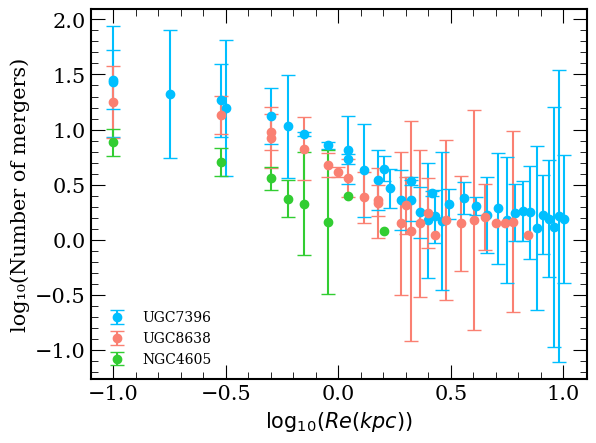

In [23]:
import statistics

import matplotlib as mpl
mpl.rcParams['text.usetex'] = False

no_merger_Re = []
no_merger_n = []
max_no_merger_masses = []
merger_Re = []
merger_n = []
max_merger_masses = []
merger_num = []
merger_num_plot = []

stand_dev_masses = []
number_of_mergers = []
all_Re = []
all_n = []

sim_run = 1
if sim_run == 1:
    galaxy = 'UGC7396'
elif sim_run == 2:
    galaxy = 'UGC8638'
else:
    galaxy = 'NGC4605'

#NFW 1 values
n_values = [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
Re_values = [0.1, 0.178, 0.316, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1, 6.6, 7.1, 7.6, 8.1, 8.6, 9.1, 9.6, 10.1]

#NFW2 values
# n_values = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
# Re_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0]

#NFW3 values
#n_values = [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
#Re_values = [0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1]


for i in range(len(n_values)):
    n = n_values[i]
    for j in range (len(Re_values)):
        R_e = Re_values[j]
        data_initial = np.genfromtxt('Sim_n_'+str(n)+'_NFW-'+str(sim_run)+'_0'+'_'+str(R_e)+'.txt', skip_header=2)
        data_final = np.genfromtxt('Sim_n_'+str(n)+'_NFW-'+str(sim_run)+'_20'+'_'+str(R_e)+'.txt', skip_header=2)

        iteration_initial = data_initial [:, 0]
        iteration_final = data_final [:, 0]
        all_masses_initial = data_initial [:, 1]     #all initial masses from every iteration for a certain combination of Re and n
        all_masses_final = data_final [:, 1]

        t = 0
        initial_masses = []
        initial_num_masses = []
        while t<10: #number of iteration 
            for k in range (len(iteration_initial)):
                  if iteration_initial[k] == t:
                        initial_masses.append (all_masses_initial[k])   #all initial masses from iteration t, clears at the end of every t value
            initial_num_masses.append(len(initial_masses)) #number of masses for iteration t
            initial_masses = []
            t = t+1


        t = 0
        final_masses = []
        final_num_masses = []
        max_masses = []
        while t<10:
            for k in range (len(iteration_final)):
                if iteration_final[k] == t:
                    final_masses.append (all_masses_final[k])   
            final_num_masses.append(len(final_masses))
            max_masses.append(max(final_masses))
            final_masses = []
            t = t+1

        max_mass = sum(max_masses)/len(max_masses)
        num_mergers = []
        for i in range (10):
            num_mergers.append (initial_num_masses[i] - final_num_masses[i])
        avg_num_mergers = sum(num_mergers)/len(num_mergers)

        median_num_mergers = statistics.median(num_mergers)
        median_max_mass = statistics.median(max_masses)
        stand_dev_num = np.std(num_mergers)
        stand_dev_mass = np.std(max_masses)
        stand_dev_masses.append (stand_dev_mass)

        #f.write (str(R_e)+ ' ' +str(n)+ ' ' +str(avg_num_mergers)+' ' +str(max_mass)+ ' ' +str(median_num_mergers)+ ' ' +str(median_max_mass)+ ' '+str(stand_dev_num)+' '+str(stand_dev_mass)+'\n')        

        if avg_num_mergers <=1:
            no_merger_Re.append(R_e)
            no_merger_n.append(n)
            max_no_merger_masses.append (max_mass)

        else:
            merger_Re.append(R_e)
            merger_n.append(n)
            max_merger_masses.append (max_mass)
            merger_num.append(avg_num_mergers)




zoom_n_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1]
zoom_Re_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9]
zoom_no_merger_Re = []
zoom_no_merger_n = []
zoom_max_no_merger_masses = []
zoom_merger_Re = []
zoom_merger_n = []
zoom_max_merger_masses = []
zoom_merger_num = []
zoom_merger_num_plot = []

zoom_stand_dev_masses = []
zoom_number_of_mergers = []
zoom_all_Re = []
zoom_all_n = []
for i in range(len(zoom_n_values)):
    zoom_n = zoom_n_values[i]
    for j in range (len(zoom_Re_values)):
        zoom_R_e = zoom_Re_values[j]   
        file = 'Sim_n_'+str(zoom_n)+'_ZoomNFW-'+str(sim_run)+'_20'+'_'+str(zoom_R_e)+'.txt'
        if os.path.exists(file):
            
            zoom_data_initial = np.genfromtxt('Sim_n_'+str(zoom_n)+'_ZoomNFW-'+str(sim_run)+'_0'+'_'+str(zoom_R_e)+'.txt', skip_header=2)
            zoom_data_final = np.genfromtxt('Sim_n_'+str(zoom_n)+'_ZoomNFW-'+str(sim_run)+'_20'+'_'+str(zoom_R_e)+'.txt', skip_header=2)

            zoom_iteration_initial = zoom_data_initial [:, 0]
            zoom_iteration_final = zoom_data_final [:, 0]
            zoom_all_masses_initial = zoom_data_initial [:, 1]     #all initial masses from every iteration for a certain combination of Re and n
            zoom_all_masses_final = zoom_data_final [:, 1]

            t = 0
            zoom_initial_masses = []
            zoom_initial_num_masses = []
            while t<10: #number of iteration 
                for k in range (len(zoom_iteration_initial)):
                    if zoom_iteration_initial[k] == t:  
                        zoom_initial_masses.append (zoom_all_masses_initial[k])   #all initial masses from iteration t, clears at the end of every t value
                zoom_initial_num_masses.append(len(zoom_initial_masses)) #number of masses for iteration t
                zoom_initial_masses = []
                t = t+1


            t = 0
            zoom_final_masses = []
            zoom_final_num_masses = []
            zoom_max_masses = []
            while t<10:
                for k in range (len(zoom_iteration_final)):
                    if zoom_iteration_final[k] == t:
                        zoom_final_masses.append (zoom_all_masses_final[k])   
                zoom_final_num_masses.append(len(zoom_final_masses))
                zoom_max_masses.append(max(zoom_final_masses))
                zoom_final_masses = []
                t = t+1

            zoom_max_mass = sum(zoom_max_masses)/len(zoom_max_masses)
            zoom_num_mergers = []
            for i in range (10):
                zoom_num_mergers.append (zoom_initial_num_masses[i] - zoom_final_num_masses[i])
            zoom_avg_num_mergers = sum(zoom_num_mergers)/len(zoom_num_mergers)

            zoom_median_num_mergers = statistics.median(zoom_num_mergers)
            zoom_median_max_mass = statistics.median(zoom_max_masses)
            zoom_stand_dev_num = np.std(zoom_num_mergers)
            zoom_stand_dev_mass = np.std(zoom_max_masses)
            zoom_stand_dev_masses.append (zoom_stand_dev_mass)


            zoom_number_of_mergers.append (zoom_avg_num_mergers)
            zoom_all_Re.append (zoom_R_e)
            zoom_all_n.append (zoom_n)

            if zoom_avg_num_mergers <= 1:
                zoom_no_merger_Re.append(zoom_R_e)
                zoom_no_merger_n.append(zoom_n)
                zoom_max_no_merger_masses.append (zoom_max_mass)

            else:
                zoom_merger_Re.append(zoom_R_e)
                zoom_merger_n.append(zoom_n)
                zoom_max_merger_masses.append (zoom_max_mass)
                zoom_merger_num.append(zoom_avg_num_mergers)
        else:
            print ('point does not exist')
            
#log Re and log # mergers 
value_indices = {}
Re_plot =[]
avg_merger_num_for_Re=[]
std_merger_num_for_Re=[]
for index, value in enumerate(merger_Re):
    if value in value_indices:
        value_indices[value].append(index)
    else:
        value_indices[value] = [index]

for value, indices in value_indices.items():
    Re_plot.append(value)
    merger_num_for_Re=[]
    for i in range (len(indices)):
        index=indices[i]
        merger_num_for_Re.append (merger_num[index])
    avg_merger_num_for_Re.append(np.average(merger_num_for_Re))
    std_merger_num_for_Re.append(np.std(merger_num_for_Re))
    #print(f"Value {value} occurs at indices: {indices}")
##################################################################    
value_indices = {}
for index, value in enumerate(zoom_merger_Re):
    if value in value_indices:
        value_indices[value].append(index)
    else:
        value_indices[value] = [index]

for value, indices in value_indices.items():
    Re_plot.append(value)
    merger_num_for_Re=[]
    for i in range (len(indices)):
        index=indices[i]
        merger_num_for_Re.append (zoom_merger_num[index])
    avg_merger_num_for_Re.append(np.average(merger_num_for_Re))
    std_merger_num_for_Re.append(np.std(merger_num_for_Re))
    #print(f"Value {value} occurs at indices: {indices}")

data = sorted(zip(Re_plot, avg_merger_num_for_Re, std_merger_num_for_Re))
Re_plot_sorted, avg_merger_num_for_Re_sorted, std_merger_num_for_Re_sorted = zip(*data)

plt.errorbar(np.log10(Re_plot_sorted), np.log10(avg_merger_num_for_Re_sorted), yerr=np.log10(std_merger_num_for_Re_sorted), color='deepskyblue', capsize=5, marker='o', label=galaxy, linestyle=' ')


#log Re and log # mergers
# plt.scatter (np.log10(merger_Re), np.log10(merger_num), s=5, label=galaxy, color='limegreen')
# plt.scatter (np.log10(zoom_merger_Re), np.log10(zoom_merger_num), s=5, color='limegreen')



# #log n and log # mergers
# plt.scatter (np.log10(all_n), np.log10(number_of_mergers), s=5)




################################################################################################

import statistics

no_merger_Re = []
no_merger_n = []
max_no_merger_masses = []
merger_Re = []
merger_n = []
max_merger_masses = []
merger_num = []
merger_num_plot = []

stand_dev_masses = []
number_of_mergers = []
all_Re = []
all_n = []

sim_run = 2
if sim_run == 1:
    galaxy = 'UGC7396'
elif sim_run == 2:
    galaxy = 'UGC8638'
else:
    galaxy = 'NGC4605'




#NFW2 values
n_values = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
Re_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0]

sim_run = 2

for i in range(len(n_values)):
    n = n_values[i]
    for j in range (len(Re_values)):
        R_e = Re_values[j]
        data_initial = np.genfromtxt('Sim_n_'+str(n)+'_NFW-'+str(sim_run)+'_0'+'_'+str(R_e)+'.txt', skip_header=2)
        data_final = np.genfromtxt('Sim_n_'+str(n)+'_NFW-'+str(sim_run)+'_20'+'_'+str(R_e)+'.txt', skip_header=2)

        iteration_initial = data_initial [:, 0]
        iteration_final = data_final [:, 0]
        all_masses_initial = data_initial [:, 1]     #all initial masses from every iteration for a certain combination of Re and n
        all_masses_final = data_final [:, 1]

        t = 0
        initial_masses = []
        initial_num_masses = []
        while t<10: #number of iteration 
            for k in range (len(iteration_initial)):
                  if iteration_initial[k] == t:
                        initial_masses.append (all_masses_initial[k])   #all initial masses from iteration t, clears at the end of every t value
            initial_num_masses.append(len(initial_masses)) #number of masses for iteration t
            initial_masses = []
            t = t+1


        t = 0
        final_masses = []
        final_num_masses = []
        max_masses = []
        while t<10:
            for k in range (len(iteration_final)):
                if iteration_final[k] == t:
                    final_masses.append (all_masses_final[k])   
            final_num_masses.append(len(final_masses))
            max_masses.append(max(final_masses))
            final_masses = []
            t = t+1

        max_mass = sum(max_masses)/len(max_masses)
        num_mergers = []
        for i in range (10):
            num_mergers.append (initial_num_masses[i] - final_num_masses[i])
        avg_num_mergers = sum(num_mergers)/len(num_mergers)

        median_num_mergers = statistics.median(num_mergers)
        median_max_mass = statistics.median(max_masses)
        stand_dev_num = np.std(num_mergers)
        stand_dev_mass = np.std(max_masses)
        stand_dev_masses.append (stand_dev_mass)

        #f.write (str(R_e)+ ' ' +str(n)+ ' ' +str(avg_num_mergers)+' ' +str(max_mass)+ ' ' +str(median_num_mergers)+ ' ' +str(median_max_mass)+ ' '+str(stand_dev_num)+' '+str(stand_dev_mass)+'\n')        

        if avg_num_mergers <=1:
            no_merger_Re.append(R_e)
            no_merger_n.append(n)
            max_no_merger_masses.append (max_mass)

        else:
            merger_Re.append(R_e)
            merger_n.append(n)
            max_merger_masses.append (max_mass)
            merger_num.append(avg_num_mergers)




zoom_n_values = [0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 1.9, 2.1]
zoom_Re_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9]
zoom_no_merger_Re = []
zoom_no_merger_n = []
zoom_max_no_merger_masses = []
zoom_merger_Re = []
zoom_merger_n = []
zoom_max_merger_masses = []
zoom_merger_num = []
zoom_merger_num_plot = []

zoom_stand_dev_masses = []
zoom_number_of_mergers = []
zoom_all_Re = []
zoom_all_n = []
for i in range(len(zoom_n_values)):
    zoom_n = zoom_n_values[i]
    for j in range (len(zoom_Re_values)):
        zoom_R_e = zoom_Re_values[j]   
        file = 'Sim_n_'+str(zoom_n)+'_ZoomNFW-'+str(sim_run)+'_20'+'_'+str(zoom_R_e)+'.txt'
        if os.path.exists(file):
            
            zoom_data_initial = np.genfromtxt('Sim_n_'+str(zoom_n)+'_ZoomNFW-'+str(sim_run)+'_0'+'_'+str(zoom_R_e)+'.txt', skip_header=2)
            zoom_data_final = np.genfromtxt('Sim_n_'+str(zoom_n)+'_ZoomNFW-'+str(sim_run)+'_20'+'_'+str(zoom_R_e)+'.txt', skip_header=2)

            zoom_iteration_initial = zoom_data_initial [:, 0]
            zoom_iteration_final = zoom_data_final [:, 0]
            zoom_all_masses_initial = zoom_data_initial [:, 1]     #all initial masses from every iteration for a certain combination of Re and n
            zoom_all_masses_final = zoom_data_final [:, 1]

            t = 0
            zoom_initial_masses = []
            zoom_initial_num_masses = []
            while t<10: #number of iteration 
                for k in range (len(zoom_iteration_initial)):
                    if zoom_iteration_initial[k] == t:  
                        zoom_initial_masses.append (zoom_all_masses_initial[k])   #all initial masses from iteration t, clears at the end of every t value
                zoom_initial_num_masses.append(len(zoom_initial_masses)) #number of masses for iteration t
                zoom_initial_masses = []
                t = t+1


            t = 0
            zoom_final_masses = []
            zoom_final_num_masses = []
            zoom_max_masses = []
            while t<10:
                for k in range (len(zoom_iteration_final)):
                    if zoom_iteration_final[k] == t:
                        zoom_final_masses.append (zoom_all_masses_final[k])   
                zoom_final_num_masses.append(len(zoom_final_masses))
                zoom_max_masses.append(max(zoom_final_masses))
                zoom_final_masses = []
                t = t+1

            zoom_max_mass = sum(zoom_max_masses)/len(zoom_max_masses)
            zoom_num_mergers = []
            for i in range (10):
                zoom_num_mergers.append (zoom_initial_num_masses[i] - zoom_final_num_masses[i])
            zoom_avg_num_mergers = sum(zoom_num_mergers)/len(zoom_num_mergers)

            zoom_median_num_mergers = statistics.median(zoom_num_mergers)
            zoom_median_max_mass = statistics.median(zoom_max_masses)
            zoom_stand_dev_num = np.std(zoom_num_mergers)
            zoom_stand_dev_mass = np.std(zoom_max_masses)
            zoom_stand_dev_masses.append (zoom_stand_dev_mass)


            zoom_number_of_mergers.append (zoom_avg_num_mergers)
            zoom_all_Re.append (zoom_R_e)
            zoom_all_n.append (zoom_n)

            if zoom_avg_num_mergers <= 1:
                zoom_no_merger_Re.append(zoom_R_e)
                zoom_no_merger_n.append(zoom_n)
                zoom_max_no_merger_masses.append (zoom_max_mass)

            else:
                zoom_merger_Re.append(zoom_R_e)
                zoom_merger_n.append(zoom_n)
                zoom_max_merger_masses.append (zoom_max_mass)
                zoom_merger_num.append(zoom_avg_num_mergers)
        else:
            print ('point does not exist')

            
#log Re and log # mergers 
value_indices = {}
Re_plot =[]
avg_merger_num_for_Re=[]
std_merger_num_for_Re=[]
for index, value in enumerate(merger_Re):
    if value in value_indices:
        value_indices[value].append(index)
    else:
        value_indices[value] = [index]

for value, indices in value_indices.items():
    Re_plot.append(value)
    merger_num_for_Re=[]
    for i in range (len(indices)):
        index=indices[i]
        merger_num_for_Re.append (merger_num[index])
    avg_merger_num_for_Re.append(np.average(merger_num_for_Re))
    std_merger_num_for_Re.append(np.std(merger_num_for_Re))
    #print(f"Value {value} occurs at indices: {indices}")
##################################################################    
value_indices = {}
for index, value in enumerate(zoom_merger_Re):
    if value in value_indices:
        value_indices[value].append(index)
    else:
        value_indices[value] = [index]

for value, indices in value_indices.items():
    Re_plot.append(value)
    merger_num_for_Re=[]
    for i in range (len(indices)):
        index=indices[i]
        merger_num_for_Re.append (zoom_merger_num[index])
    avg_merger_num_for_Re.append(np.average(merger_num_for_Re))
    std_merger_num_for_Re.append(np.std(merger_num_for_Re))
    #print(f"Value {value} occurs at indices: {indices}")
data = sorted(zip(Re_plot, avg_merger_num_for_Re, std_merger_num_for_Re))
Re_plot_sorted, avg_merger_num_for_Re_sorted, std_merger_num_for_Re_sorted = zip(*data)

plt.errorbar(np.log10(Re_plot_sorted), np.log10(avg_merger_num_for_Re_sorted), yerr=np.log10(std_merger_num_for_Re_sorted), color='salmon', capsize=5, marker='o', label=galaxy, linestyle=' ')


#log Re and log # mergers
# plt.scatter (np.log10(merger_Re), np.log10(merger_num), s=5, label=galaxy, color='salmon')
# plt.scatter (np.log10(zoom_merger_Re), np.log10(zoom_merger_num), s=5, color='salmon')



# #log n and log # mergers
# plt.scatter (np.log10(all_n), np.log10(number_of_mergers), s=5)


          
###############################
import statistics

no_merger_Re = []
no_merger_n = []
max_no_merger_masses = []
merger_Re = []
merger_n = []
max_merger_masses = []
merger_num = []
merger_num_plot = []

stand_dev_masses = []
number_of_mergers = []
all_Re = []
all_n = []

sim_run = 3
if sim_run == 1:
    galaxy = 'UGC7396'
elif sim_run == 2:
    galaxy = 'UGC8638'
else:
    galaxy = 'NGC4605'


#NFW3 values
n_values = [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
Re_values = [0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1]
sim_run=3

for i in range(len(n_values)):
    n = n_values[i]
    for j in range (len(Re_values)):
        R_e = Re_values[j]
        data_initial = np.genfromtxt('Sim_n_'+str(n)+'_NFW-'+str(sim_run)+'_0'+'_'+str(R_e)+'.txt', skip_header=2)
        data_final = np.genfromtxt('Sim_n_'+str(n)+'_NFW-'+str(sim_run)+'_20'+'_'+str(R_e)+'.txt', skip_header=2)

        iteration_initial = data_initial [:, 0]
        iteration_final = data_final [:, 0]
        all_masses_initial = data_initial [:, 1]     #all initial masses from every iteration for a certain combination of Re and n
        all_masses_final = data_final [:, 1]

        t = 0
        initial_masses = []
        initial_num_masses = []
        while t<10: #number of iteration 
            for k in range (len(iteration_initial)):
                  if iteration_initial[k] == t:
                        initial_masses.append (all_masses_initial[k])   #all initial masses from iteration t, clears at the end of every t value
            initial_num_masses.append(len(initial_masses)) #number of masses for iteration t
            initial_masses = []
            t = t+1


        t = 0
        final_masses = []
        final_num_masses = []
        max_masses = []
        while t<10:
            for k in range (len(iteration_final)):
                if iteration_final[k] == t:
                    final_masses.append (all_masses_final[k])   
            final_num_masses.append(len(final_masses))
            max_masses.append(max(final_masses))
            final_masses = []
            t = t+1

        max_mass = sum(max_masses)/len(max_masses)
        num_mergers = []
        for i in range (10):
            num_mergers.append (initial_num_masses[i] - final_num_masses[i])
        avg_num_mergers = sum(num_mergers)/len(num_mergers)

        median_num_mergers = statistics.median(num_mergers)
        median_max_mass = statistics.median(max_masses)
        stand_dev_num = np.std(num_mergers)
        stand_dev_mass = np.std(max_masses)
        stand_dev_masses.append (stand_dev_mass)

        #f.write (str(R_e)+ ' ' +str(n)+ ' ' +str(avg_num_mergers)+' ' +str(max_mass)+ ' ' +str(median_num_mergers)+ ' ' +str(median_max_mass)+ ' '+str(stand_dev_num)+' '+str(stand_dev_mass)+'\n')        

        if avg_num_mergers <=1:
            no_merger_Re.append(R_e)
            no_merger_n.append(n)
            max_no_merger_masses.append (max_mass)

        else:
            merger_Re.append(R_e)
            merger_n.append(n)
            max_merger_masses.append (max_mass)
            merger_num.append(avg_num_mergers)




zoom_n_values = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1]
zoom_Re_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9]
zoom_no_merger_Re = []
zoom_no_merger_n = []
zoom_max_no_merger_masses = []
zoom_merger_Re = []
zoom_merger_n = []
zoom_max_merger_masses = []
zoom_merger_num = []
zoom_merger_num_plot = []

zoom_stand_dev_masses = []
zoom_number_of_mergers = []
zoom_all_Re = []
zoom_all_n = []
for i in range(len(zoom_n_values)):
    zoom_n = zoom_n_values[i]
    for j in range (len(zoom_Re_values)):
        zoom_R_e = zoom_Re_values[j]   
        file = 'Sim_n_'+str(zoom_n)+'_ZoomNFW-'+str(sim_run)+'_20'+'_'+str(zoom_R_e)+'.txt'
        if os.path.exists(file):
            
            zoom_data_initial = np.genfromtxt('Sim_n_'+str(zoom_n)+'_ZoomNFW-'+str(sim_run)+'_0'+'_'+str(zoom_R_e)+'.txt', skip_header=2)
            zoom_data_final = np.genfromtxt('Sim_n_'+str(zoom_n)+'_ZoomNFW-'+str(sim_run)+'_20'+'_'+str(zoom_R_e)+'.txt', skip_header=2)

            zoom_iteration_initial = zoom_data_initial [:, 0]
            zoom_iteration_final = zoom_data_final [:, 0]
            zoom_all_masses_initial = zoom_data_initial [:, 1]     #all initial masses from every iteration for a certain combination of Re and n
            zoom_all_masses_final = zoom_data_final [:, 1]

            t = 0
            zoom_initial_masses = []
            zoom_initial_num_masses = []
            while t<10: #number of iteration 
                for k in range (len(zoom_iteration_initial)):
                    if zoom_iteration_initial[k] == t:  
                        zoom_initial_masses.append (zoom_all_masses_initial[k])   #all initial masses from iteration t, clears at the end of every t value
                zoom_initial_num_masses.append(len(zoom_initial_masses)) #number of masses for iteration t
                zoom_initial_masses = []
                t = t+1


            t = 0
            zoom_final_masses = []
            zoom_final_num_masses = []
            zoom_max_masses = []
            while t<10:
                for k in range (len(zoom_iteration_final)):
                    if zoom_iteration_final[k] == t:
                        zoom_final_masses.append (zoom_all_masses_final[k])   
                zoom_final_num_masses.append(len(zoom_final_masses))
                zoom_max_masses.append(max(zoom_final_masses))
                zoom_final_masses = []
                t = t+1

            zoom_max_mass = sum(zoom_max_masses)/len(zoom_max_masses)
            zoom_num_mergers = []
            for i in range (10):
                zoom_num_mergers.append (zoom_initial_num_masses[i] - zoom_final_num_masses[i])
            zoom_avg_num_mergers = sum(zoom_num_mergers)/len(zoom_num_mergers)

            zoom_median_num_mergers = statistics.median(zoom_num_mergers)
            zoom_median_max_mass = statistics.median(zoom_max_masses)
            zoom_stand_dev_num = np.std(zoom_num_mergers)
            zoom_stand_dev_mass = np.std(zoom_max_masses)
            zoom_stand_dev_masses.append (zoom_stand_dev_mass)


            zoom_number_of_mergers.append (zoom_avg_num_mergers)
            zoom_all_Re.append (zoom_R_e)
            zoom_all_n.append (zoom_n)

            if zoom_avg_num_mergers <= 1:
                zoom_no_merger_Re.append(zoom_R_e)
                zoom_no_merger_n.append(zoom_n)
                zoom_max_no_merger_masses.append (zoom_max_mass)

            else:
                zoom_merger_Re.append(zoom_R_e)
                zoom_merger_n.append(zoom_n)
                zoom_max_merger_masses.append (zoom_max_mass)
                zoom_merger_num.append(zoom_avg_num_mergers)
        else:
            print ('point does not exist')
            
#log Re and log # mergers 
value_indices = {}
Re_plot =[]
avg_merger_num_for_Re=[]
std_merger_num_for_Re=[]
for index, value in enumerate(merger_Re):
    if value in value_indices:
        value_indices[value].append(index)
    else:
        value_indices[value] = [index]

for value, indices in value_indices.items():
    Re_plot.append(value)
    merger_num_for_Re=[]
    for i in range (len(indices)):
        index=indices[i]
        merger_num_for_Re.append (merger_num[index])
    avg_merger_num_for_Re.append(np.average(merger_num_for_Re))
    std_merger_num_for_Re.append(np.std(merger_num_for_Re))
    #print(f"Value {value} occurs at indices: {indices}")
##################################################################    
value_indices = {}
for index, value in enumerate(zoom_merger_Re):
    if value in value_indices:
        value_indices[value].append(index)
    else:
        value_indices[value] = [index]

for value, indices in value_indices.items():
    Re_plot.append(value)
    merger_num_for_Re=[]
    for i in range (len(indices)):
        index=indices[i]
        merger_num_for_Re.append (zoom_merger_num[index])
    avg_merger_num_for_Re.append(np.average(merger_num_for_Re))
    std_merger_num_for_Re.append(np.std(merger_num_for_Re))
    #print(f"Value {value} occurs at indices: {indices}")
data = sorted(zip(Re_plot, avg_merger_num_for_Re, std_merger_num_for_Re))
Re_plot_sorted, avg_merger_num_for_Re_sorted, std_merger_num_for_Re_sorted = zip(*data)


plt.errorbar(np.log10(Re_plot_sorted), np.log10(avg_merger_num_for_Re_sorted), yerr=np.log10(std_merger_num_for_Re_sorted), color='limegreen', capsize=5, marker='o', label=galaxy, linestyle=' ')
plt.xlabel(r'$\log_{10}(Re (kpc))$')
plt.ylabel('log₁₀(Number of mergers)')
#plt.title('Number of mergers vs Re', fontsize=20)
plt.legend(loc='lower left', frameon=False, fontsize=10)
plt.savefig('num_mergers_re.png', dpi=300)


# #log Re and log # mergers
# plt.scatter (np.log10(merger_Re), np.log10(merger_num), s=5, label=galaxy, color='deepskyblue')
# plt.scatter (np.log10(zoom_merger_Re), np.log10(zoom_merger_num), s=5, color='deepskyblue')
# plt.xlabel(r'$\log_{10}(Re)$')
# plt.ylabel('log₁₀(Number of mergers)')
# plt.legend(loc='upper right', frameon=False, fontsize=10)

# #log n and log # mergers
# plt.scatter (np.log10(all_n), np.log10(number_of_mergers), s=5)
# plt.xlabel('log n')
# plt.ylabel('log Number of mergers')
# plt.title (galaxy, fontsize=15)
# plt.show()


plt.show()           

file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist


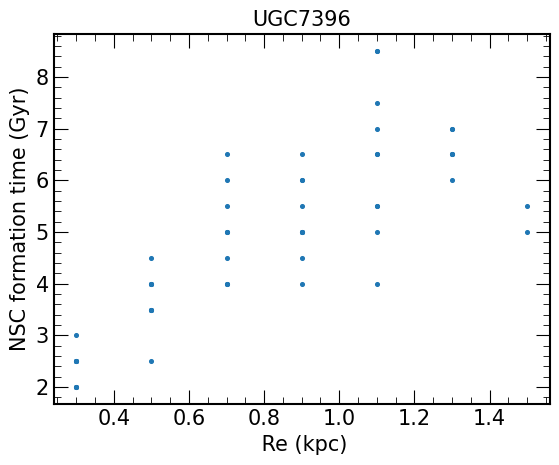

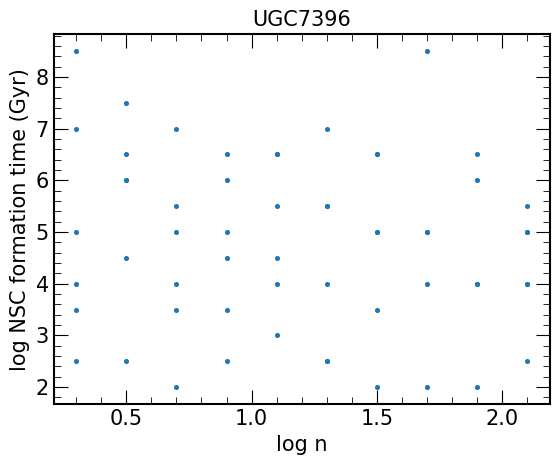

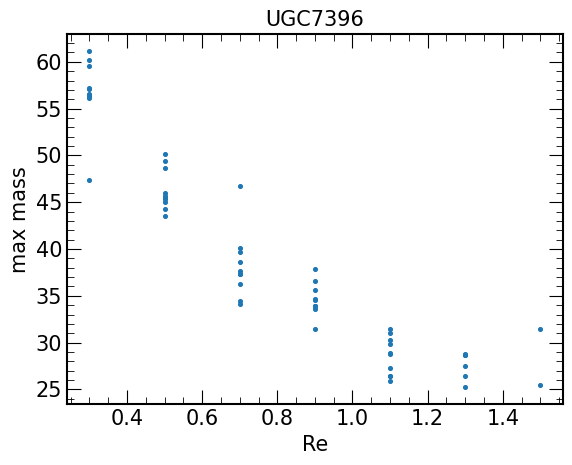

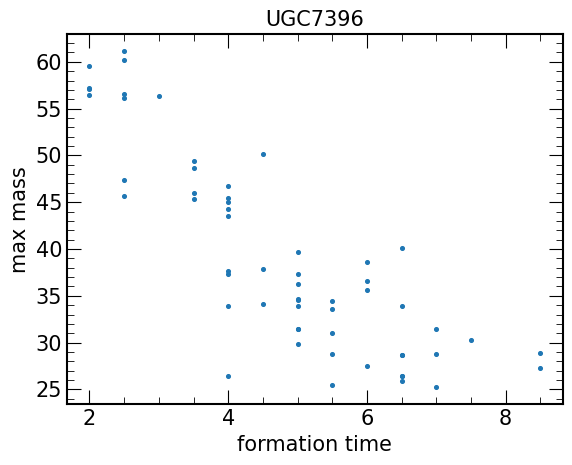

In [181]:
# NSC_formation_mass = []

sim_run = 1
if sim_run == 1:
    galaxy = 'UGC7396'
elif sim_run == 2:
    galaxy = 'UGC8638'
else:
    galaxy = 'NGC4605'

NSC_formation_time = []
NSC_formation_mass=[]
formation_Re = []
formation_n = []

avg_mass_over_n = []
avg_time_over_n = []
avg_mass_std = []
avg_time_std = []


max_masses = []
Re_for_mm =[]


n_values = [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1]
Re_values = [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1, 3.5, 3.7, 3.9]

#NFW 2
# n_values = [0.5, 0.7, 1.3, 1.5, 1.7, 2.1]
# Re_values = [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9]

for i in range(len(n_values)):
    n = n_values[i]
    for j in range (len(Re_values)):
        R_e = Re_values[j]
        NSC_masses = np.zeros([10, 21])
        file = 'Sim_n_'+str(n)+'_ZoomNFW-'+str(sim_run)+'_0_'+str(R_e)+'.txt'
        
        if os.path.exists(file):
            for output_number in range(21):
                #filename = 'Sim_n_'+str(n)+'_NFW-1_'+str(output_time)+'_'+str(R_e)+'.txt'
                filename = 'Sim_n_'+str(n)+'_ZoomNFW-'+str(sim_run)+'_'+str(output_number)+'_'+str(R_e)+'.txt'
                data = np.genfromtxt(filename, skip_header=2)
                iterations = data[:, 0]
                masses = data[:, 1]
                for k in range(10):
                    relevant_masses = masses[iterations==k]
                    #print(relevant_masses)
                    NSC_masses[k, output_number] = max(relevant_masses)
                    GC_masses [k, output_number] = sum(relevant_masses)
            avg_NSC_masses = np.average(NSC_masses, axis=0)
            avg_GC_masses = np.average(GC_masses, axis=0)
            max_mass = max(avg_NSC_masses)
        
            final_mass = (avg_NSC_masses[20])

            i = 0
            while i < (21):
                if avg_NSC_masses[i]/max_mass >= 0.9 and max_mass >= 25:
                    NSC_formation_mass.append (avg_NSC_masses[i])
                    NSC_formation_time.append(i/2)
                    formation_Re.append (R_e)
                    formation_n.append (n)
                    max_masses.append(max_mass)
                    break
                else:
                    i = i+1
                    
        else:
            print('file does not exist')
            
    avg_mass_over_n.append (np.average(max_masses))
    avg_time_over_n.append (np.average(NSC_formation_time))
    avg_mass_std.append (np.std(max_masses))
    avg_time_std.append (np.std(NSC_formation_time))
                

        
# print(len(NSC_formation_mass), len(NSC_formation_time))
# plt.scatter (formation_Re, formation_n, c=NSC_formation_time, cmap = 'plasma', s=7)
# plt.xlabel('Re (kpc)')
# plt.ylabel('n')
# colorbar = plt.colorbar()
# colorbar.set_label('Time of NSC formation (Gyr)')
# plt.title (galaxy, fontsize=15)
# plt.show()


plt.scatter ((formation_Re),(NSC_formation_time), s=7)
#plt.errorbar(np.log10(Re_plot_sorted), np.log10(avg_merger_num_for_Re_sorted), yerr=np.log10(std_merger_num_for_Re_sorted), color='deepskyblue', capsize=5, marker='o', label=galaxy)
plt.xlabel(' Re (kpc)')
plt.ylabel('NSC formation time (Gyr)')
plt.title (galaxy, fontsize=15)
plt.show()



plt.scatter ((formation_n),(NSC_formation_time), s=7)
plt.xlabel('log n')
plt.ylabel('log NSC formation time (Gyr)')
plt.title (galaxy, fontsize = 15)
plt.show()

plt.scatter ((formation_Re),(max_masses), s=7)
plt.xlabel('Re')
plt.ylabel('max mass')
plt.title (galaxy, fontsize = 15)
plt.show()

plt.scatter ((NSC_formation_time),(max_masses), s=7)
plt.xlabel('formation time')
plt.ylabel('max mass')
plt.title (galaxy, fontsize = 15)
plt.show()

file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist
file does not exist


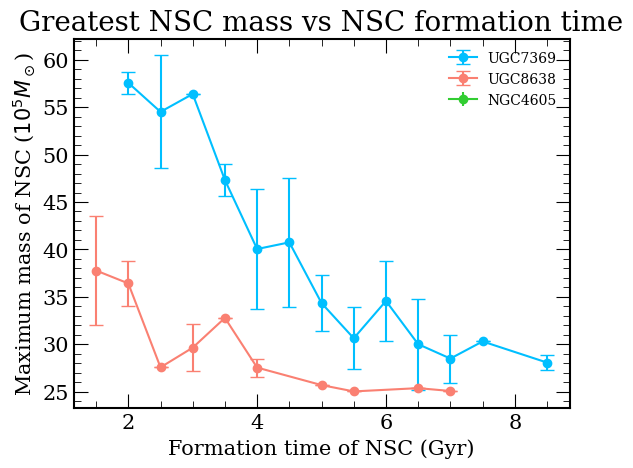

In [14]:
# NSC_formation_mass = []

sim_run = 1
if sim_run == 1:
    galaxy = 'UGC7369'
elif sim_run == 2:
    galaxy = 'UGC8638'
else:
    galaxy = 'NGC4605'

NSC_formation_time = []
NSC_formation_mass=[]
formation_Re = []
formation_n = []

avg_mass_over_n = []
avg_time_over_n = []
avg_mass_std = []
avg_time_std = []


max_masses = []
Re_for_mm =[]


n_values = [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1]
Re_values = [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1]

for i in range(len(n_values)):
    n = n_values[i]
    for j in range (len(Re_values)):
        R_e = Re_values[j]
        NSC_masses = np.zeros([10, 21])
        GC_masses = np.zeros([10, 21])
        file = 'Sim_n_'+str(n)+'_ZoomNFW-'+str(sim_run)+'_0_'+str(R_e)+'.txt'
        if os.path.exists(file):
            for output_number in range(21):
                #filename = 'Sim_n_'+str(n)+'_NFW-1_'+str(output_time)+'_'+str(R_e)+'.txt'
                filename = 'Sim_n_'+str(n)+'_ZoomNFW-'+str(sim_run)+'_'+str(output_number)+'_'+str(R_e)+'.txt'
                data = np.genfromtxt(filename, skip_header=2)
                iterations = data[:, 0]
                masses = data[:, 1]
                for k in range(10):
                    relevant_masses = masses[iterations==k]
                    NSC_masses[k, output_number] = max(relevant_masses)
                    GC_masses [k, output_number] = sum(relevant_masses)
            avg_NSC_masses = np.average(NSC_masses, axis=0)
            avg_GC_masses = np.average(GC_masses, axis=0)
            max_mass = max(avg_NSC_masses)
        
            final_mass = (avg_NSC_masses[20])

            i = 0
            while i < (21):
                if avg_NSC_masses[i]/max_mass >= 0.9 and max_mass >= 25:
                    NSC_formation_mass.append (avg_NSC_masses[i])
                    NSC_formation_time.append(i/2)
                    formation_Re.append (R_e)
                    formation_n.append (n)
                    max_masses.append(max_mass)
                    break
                else:
                    i = i+1
                    
        else:
            print('file does not exist')
            
value_indices = {}
Re_plot =[]
n_plot=[]
NSC_formation_time_plot=[]
avg_formation_time=[]
avg_formation_mass=[]
std_formation_time=[]
std_formation_mass=[]
avg_max_mass=[]
std_max_mass=[]
for index, value in enumerate(NSC_formation_time): #change this into whatever is on x axis- NSC_formation_time/formation_Re
    if value in value_indices:
        value_indices[value].append(index)
    else:
        value_indices[value] = [index]

for value, indices in value_indices.items():
    Re_plot.append(value)
    n_plot.append(value)
    NSC_formation_time_plot.append(value)
    NSC_formation_time_for_Re=[]
    NSC_formation_mass_for_Re=[]
    NSC_max_mass_for_Re = []
    for i in range (len(indices)):
        index=indices[i]
        NSC_formation_time_for_Re.append (NSC_formation_time[index])
        NSC_max_mass_for_Re.append(max_masses[index])
        NSC_formation_mass_for_Re.append(NSC_formation_mass[index])
    avg_formation_time.append(np.average(NSC_formation_time_for_Re))
    std_formation_time.append(np.std(NSC_formation_time_for_Re))
    avg_formation_mass.append(np.average(NSC_formation_mass_for_Re))
    std_formation_mass.append(np.std(NSC_formation_mass_for_Re))
    avg_max_mass.append(np.average(NSC_max_mass_for_Re))
    std_max_mass.append(np.std(NSC_max_mass_for_Re))
    #print(f"Value {value} occurs at indices: {indices}")    

data = sorted(zip(NSC_formation_time_plot, avg_max_mass, std_max_mass))
NSC_formation_time_plot_sorted, avg_max_mass_sorted, std_max_mass_sorted = zip(*data)


#plt.scatter (formation_Re, formation_n, c=NSC_formation_time, cmap = 'plasma', s=7)
# plt.xlabel('Re (kpc)')
# plt.ylabel('n')
# colorbar = plt.colorbar()
# colorbar.set_label('Time of NSC formation (Gyr)')
# plt.title (galaxy, fontsize=15)
# plt.show()


#plt.scatter ((formation_Re),(NSC_formation_time), s=7)
#plt.errorbar((Re_plot), (avg_formation_time), yerr=(std_formation_time), color='deepskyblue', capsize=5, marker='o', label=galaxy)


# plt.scatter ((formation_n),(NSC_formation_time), s=7, color='lightskyblue')
# plt.errorbar((n_plot), (avg_formation_time), yerr=(std_formation_time), color='deepskyblue', capsize=5, marker='o', label=galaxy)


# plt.scatter ((formation_Re),(max_masses), s=7)
#plt.errorbar((Re_plot), (avg_formation_mass), yerr=(std_formation_mass), color='deepskyblue', capsize=5, marker='o', label=galaxy)

#plt.scatter ((NSC_formation_time),(max_masses), s=7)
plt.errorbar((NSC_formation_time_plot_sorted), (avg_max_mass_sorted), yerr=(std_max_mass_sorted), color='deepskyblue', capsize=5, marker='o', label=galaxy)



###########################
#NFW 2
sim_run = 2
if sim_run == 1:
    galaxy = 'UGC7369'
elif sim_run == 2:
    galaxy = 'UGC8638'
else:
    galaxy = 'NGC4605'

NSC_formation_time = []
NSC_formation_mass=[]
formation_Re = []
formation_n = []

avg_mass_over_n = []
avg_time_over_n = []
avg_mass_std = []
avg_time_std = []


max_masses = []
Re_for_mm =[]
n_values = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1]
Re_values = [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9]

for i in range(len(n_values)):
    n = n_values[i]
    for j in range (len(Re_values)):
        R_e = Re_values[j]
        NSC_masses = np.zeros([10, 21])
        GC_masses = np.zeros([10, 21])
        file = 'Sim_n_'+str(n)+'_ZoomNFW-'+str(sim_run)+'_0_'+str(R_e)+'.txt'
        if os.path.exists(file):
            for output_number in range(21):
                #filename = 'Sim_n_'+str(n)+'_NFW-1_'+str(output_time)+'_'+str(R_e)+'.txt'
                filename = 'Sim_n_'+str(n)+'_ZoomNFW-'+str(sim_run)+'_'+str(output_number)+'_'+str(R_e)+'.txt'
                data = np.genfromtxt(filename, skip_header=2)
                iterations = data[:, 0]
                masses = data[:, 1]
                for k in range(10):
                    relevant_masses = masses[iterations==k]
                    NSC_masses[k, output_number] = max(relevant_masses)
                    GC_masses [k, output_number] = sum(relevant_masses)
            avg_NSC_masses = np.average(NSC_masses, axis=0)
            avg_GC_masses = np.average(GC_masses, axis=0)
            max_mass = max(avg_NSC_masses)
        
            final_mass = (avg_NSC_masses[20])

            i = 0
            while i < (21):
                if avg_NSC_masses[i]/max_mass >= 0.9 and max_mass >= 25:
                    NSC_formation_mass.append (avg_NSC_masses[i])
                    NSC_formation_time.append(i/2)
                    formation_Re.append (R_e)
                    formation_n.append (n)
                    max_masses.append(max_mass)
                    break
                else:
                    i = i+1
                    
        else:
            print('file does not exist')
            
                
value_indices = {}
Re_plot =[]
n_plot=[]
NSC_formation_time_plot=[]
avg_formation_time=[]
avg_formation_mass=[]
std_formation_time=[]
std_formation_mass=[]
avg_max_mass=[]
std_max_mass=[]
for index, value in enumerate(NSC_formation_time):
    if value in value_indices:
        value_indices[value].append(index)
    else:
        value_indices[value] = [index]

for value, indices in value_indices.items():
    Re_plot.append(value)
    n_plot.append(value)
    NSC_formation_time_plot.append(value)
    NSC_formation_time_for_Re=[]
    NSC_formation_mass_for_Re=[]
    NSC_max_mass_for_Re = []
    for i in range (len(indices)):
        index=indices[i]
        NSC_formation_time_for_Re.append (NSC_formation_time[index])
        NSC_max_mass_for_Re.append(max_masses[index])
        NSC_formation_mass_for_Re.append(NSC_formation_mass[index])
    avg_formation_time.append(np.average(NSC_formation_time_for_Re))
    std_formation_time.append(np.std(NSC_formation_time_for_Re))
    avg_formation_mass.append(np.average(NSC_formation_mass_for_Re))
    std_formation_mass.append(np.std(NSC_formation_mass_for_Re))
    avg_max_mass.append(np.average(NSC_max_mass_for_Re))
    std_max_mass.append(np.std(NSC_max_mass_for_Re))
    #print(f"Value {value} occurs at indices: {indices}")     
data = sorted(zip(NSC_formation_time_plot, avg_max_mass, std_max_mass))
NSC_formation_time_plot_sorted, avg_max_mass_sorted, std_max_mass_sorted = zip(*data)


#plt.scatter (formation_Re, formation_n, c=NSC_formation_time, cmap = 'plasma', s=7)
# plt.xlabel('Re (kpc)')
# plt.ylabel('n')
# colorbar = plt.colorbar()
# colorbar.set_label('Time of NSC formation (Gyr)')
# plt.title (galaxy, fontsize=15)
# plt.show()


#plt.scatter ((formation_Re),(NSC_formation_time), s=7)
#plt.errorbar((Re_plot), (avg_formation_time), yerr=(std_formation_time), color='salmon', capsize=5, marker='o', label=galaxy)


# plt.scatter ((formation_n),(NSC_formation_time), s=7, color = 'lightsalmon')
# plt.errorbar((n_plot), (avg_formation_time), yerr=(std_formation_time), color='salmon', capsize=5, marker='o', label=galaxy)


# plt.scatter ((formation_Re),(max_masses), s=7)
#plt.errorbar((Re_plot), (avg_formation_mass), yerr=(std_formation_mass), color='salmon', capsize=5, marker='o', label=galaxy)

# plt.scatter ((NSC_formation_time),(max_masses), s=7)
plt.errorbar((NSC_formation_time_plot_sorted), (avg_max_mass_sorted), yerr=(std_max_mass_sorted), color='salmon', capsize=5, marker='o', label=galaxy)




##############################
###########################
#NFW 3
sim_run = 3
if sim_run == 1:
    galaxy = 'UGC7369'
elif sim_run == 2:
    galaxy = 'UGC8638'
else:
    galaxy = 'NGC4605'

NSC_formation_time = []
NSC_formation_mass=[]
formation_Re = []
formation_n = []

avg_mass_over_n = []
avg_time_over_n = []
avg_mass_std = []
avg_time_std = []


max_masses = []
Re_for_mm =[]


n_values = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1]
Re_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9]

for i in range(len(n_values)):
    n = n_values[i]
    for j in range (len(Re_values)):
        R_e = Re_values[j]
        NSC_masses = np.zeros([10, 21])
        GC_masses = np.zeros([10, 21])
        file = 'Sim_n_'+str(n)+'_ZoomNFW-'+str(sim_run)+'_0_'+str(R_e)+'.txt'
        if os.path.exists(file):
            for output_number in range(21):
                #filename = 'Sim_n_'+str(n)+'_NFW-1_'+str(output_time)+'_'+str(R_e)+'.txt'
                filename = 'Sim_n_'+str(n)+'_ZoomNFW-'+str(sim_run)+'_'+str(output_number)+'_'+str(R_e)+'.txt'
                data = np.genfromtxt(filename, skip_header=2)
                iterations = data[:, 0]
                masses = data[:, 1]
                for k in range(10):
                    relevant_masses = masses[iterations==k]
                    NSC_masses[k, output_number] = max(relevant_masses)
                    GC_masses [k, output_number] = sum(relevant_masses)
            avg_NSC_masses = np.average(NSC_masses, axis=0)
            avg_GC_masses = np.average(GC_masses, axis=0)
            max_mass = max(avg_NSC_masses)
        
            final_mass = (avg_NSC_masses[20])

            i = 0
            while i < (21):
                if avg_NSC_masses[i]/max_mass >= 0.9 and max_mass >= 25:
                    NSC_formation_mass.append (avg_NSC_masses[i])
                    NSC_formation_time.append(i/2)
                    formation_Re.append (R_e)
                    formation_n.append (n)
                    max_masses.append(max_mass)
                    break
                else:
                    i = i+1
                    
        else:
            print('file does not exist')
            
                
value_indices = {}
Re_plot =[]
n_plot=[]
NSC_formation_time_plot=[]
avg_formation_time=[]
avg_formation_mass=[]
std_formation_time=[]
std_formation_mass=[]
avg_max_mass=[]
std_max_mass=[]
for index, value in enumerate(NSC_formation_time):
    if value in value_indices:
        value_indices[value].append(index)
    else:
        value_indices[value] = [index]

for value, indices in value_indices.items():
    Re_plot.append(value)
    n_plot.append(value)
    NSC_formation_time_plot.append(value)
    NSC_formation_time_for_Re=[]
    NSC_formation_mass_for_Re=[]
    NSC_max_mass_for_Re = []
    for i in range (len(indices)):
        index=indices[i]
        NSC_formation_time_for_Re.append (NSC_formation_time[index])
        NSC_max_mass_for_Re.append(max_masses[index])
        NSC_formation_mass_for_Re.append(NSC_formation_mass[index])
    avg_formation_time.append(np.average(NSC_formation_time_for_Re))
    std_formation_time.append(np.std(NSC_formation_time_for_Re))
    avg_formation_mass.append(np.average(NSC_formation_mass_for_Re))
    std_formation_mass.append(np.std(NSC_formation_mass_for_Re))
    avg_max_mass.append(np.average(NSC_max_mass_for_Re))
    std_max_mass.append(np.std(NSC_max_mass_for_Re))
    #print(f"Value {value} occurs at indices: {indices}")    
#data = sorted(zip(NSC_formation_time_plot, avg_max_mass, std_max_mass))
#NSC_formation_time_plot_sorted, avg_max_mass_sorted, std_max_mass_sorted = zip(*data)



#plt.scatter (formation_Re, formation_n, c=NSC_formation_time, cmap = 'plasma', s=7)
# plt.xlabel('Re (kpc)')
# plt.ylabel('n')
# colorbar = plt.colorbar()
# colorbar.set_label('Time of NSC formation (Gyr)')
# plt.title (galaxy, fontsize=15)
# plt.show()


# #plt.scatter ((formation_Re),(NSC_formation_time), s=7)
# plt.errorbar((Re_plot), (avg_formation_time), yerr=(std_formation_time), color='limegreen', capsize=5, marker='o', label=galaxy)
# plt.xlabel('Re (kpc)')
# plt.ylabel('NSC formation time (Gyr)')
# plt.legend(loc='upper right', frameon=False, fontsize=10)
# plt.title ('Time of formation of NSC vs Re')
# plt.savefig('re_formation_time.png', dpi=300)
# plt.show()

# plt.scatter ((formation_n),(NSC_formation_time), s=7, color = 'greenyellow')
# plt.errorbar((n_plot), (avg_formation_time), yerr=(std_formation_time), color='limegreen', capsize=5, marker='o', label=galaxy)
# plt.xlabel('n')
# plt.ylabel('NSC formation time (Gyr)')
# plt.title (galaxy, fontsize = 15)
# plt.show()

# # plt.scatter ((Re_plot),(avg_formation_masses), s=7)
# plt.errorbar((Re_plot), (avg_formation_mass), yerr=(std_formation_mass), color='limegreen', capsize=5, marker='o', label=galaxy)
# plt.xlabel('Re')
# plt.ylabel('max mass')
# plt.legend(loc='upper right', frameon=False, fontsize=10)
# plt.title('Highest mass achived by NSC vs Re')
# plt.show()

# plt.scatter ((avg_formation_time),(avg_formation_masses), s=7)
plt.errorbar((NSC_formation_time_plot), (avg_max_mass), yerr=(std_max_mass), color='limegreen', capsize=5, marker='o', label=galaxy)
plt.xlabel('Formation time of NSC (Gyr)')
plt.ylabel('Maximum mass of NSC ($10^5M_\odot$)')
plt.legend(loc='upper right', frameon=False, fontsize=10)
plt.title ('Greatest NSC mass vs NSC formation time', fontsize=20)
plt.savefig('formation_time_max_mass.png', dpi=300)
plt.show()

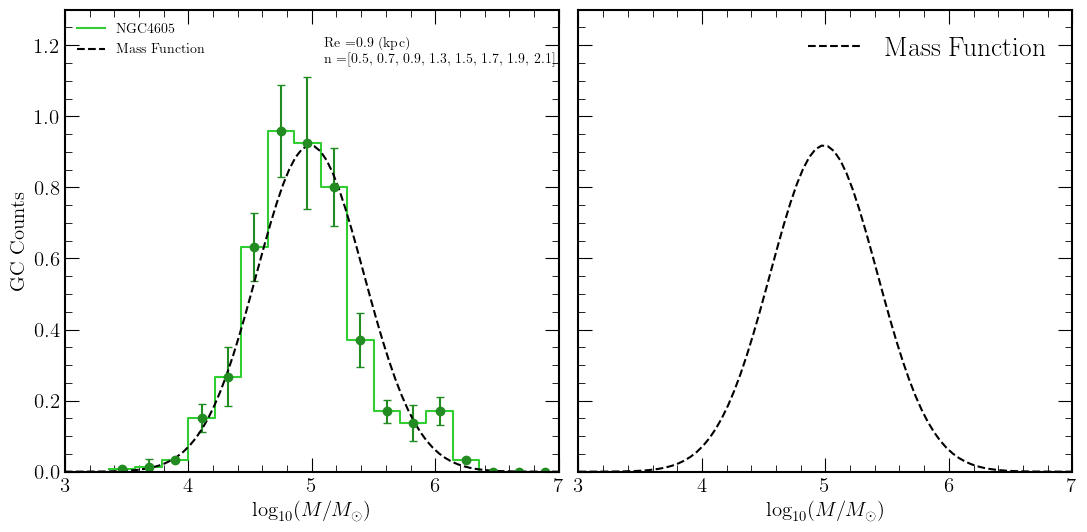

In [25]:
# GC Mass functions at the end of the sims)

n_values = [0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 1.9, 2.1]
R_e = 0.9

UGC7369_masses = np.array([ 0.5270876 ,  0.15333488,  1.08466861,  0.23894274,  0.53477108,
        0.66067185,  2.74824974, 43.7230426 ,  0.25702028,  0.68325756,
        0.48945594,  0.78176033,  0.98889862,  0.70596634,  1.74467125,
        1.42423357,  1.17664156,  0.49028781,  0.71836984,  0.42620355,
        0.33863009])
NGC4605_masses = np.array([2.798490319888382, 0.17272820745171386, 0.9355246302950031, 2.806435077847868, 2.1865372126689695, 
 1.2407313733134462, 0.4584233399638007, 0.2937634439341443, 2.563561443019776, 0.21426819543381712, 
 0.664212064963621])
UGC8638_masses = np.array([0.3409560719297101, 1.5371520691156104, 29.201961429284346])


bin_edges = np.array([4-3*0.2142857142857144, 4-2*0.2142857142857144, 4-0.2142857142857144]\
                    +list(np.linspace(4, 7, 15))) #np.linspace(3, 7, 12)

fig, ax = plt.subplots(1, 2, figsize=(13, 6), sharey=True, sharex=True)
bin_centers = np.array([(bin_edges[i+1]+bin_edges[i])/2 for i in range(len(bin_edges)-1)])
# # adjust the genfromtxt path to wherever you've been saving the outputs of the run_iterations bit
# counts_n_NFW = []
# for i in range(len(n_values)):
#     n = n_values[i]
#     data_NFW = np.genfromtxt('Sim_n_'+str(n)+'_ZoomNFW-1_20'+'_'+str(R_e)+'.txt', skip_header=2)
#     masses_NFW = data_NFW[:, 1]
#     iterations_NFW = data_NFW[:, 0]
#     total_counts_NFW = np.zeros(bin_edges.shape[0]-1)
#     array_of_counts_NFW = np.zeros([bin_edges.shape[0]-1, 50])
#     total_masses_NFW = np.zeros(10)
#     for j in range(10):
#         counts_NFW_j, _ = np.histogram(np.log10(masses_NFW[iterations_NFW==j]*1e5), bins=bin_edges)
#         total_counts_NFW += counts_NFW_j
#         array_of_counts_NFW[:, j] = counts_NFW_j
#         total_masses_NFW[j] = sum(masses_NFW[iterations_NFW==j])
#         continue

#     average_counts_NFW = total_counts_NFW/10
#     std_counts_NFW = np.sqrt(np.std(array_of_counts_NFW, axis=1)**2 /10)
#     #print(np.average(total_masses_NFW))
#     #print(np.std(total_masses_NFW))
#     counts_n_NFW.append(average_counts_NFW)
# average_counts_n_NFW = np.sum(counts_n_NFW, axis=0)


# #ax[0].bar(bin_edges[:-1], average_counts_n_NFW/np.sum(average_counts_n_NFW*0.2142857142857144), align='edge', width=0.2142857142857144, color='powderblue', label='UGC7369')
# ax[0].plot(bin_edges[:-1], average_counts_n_NFW/np.sum(average_counts_n_NFW*0.2142857142857144), drawstyle='steps-post', color='dodgerblue', label='UGC7369')
# ax[0].errorbar(bin_centers, average_counts_n_NFW/np.sum(average_counts_n_NFW*0.2142857142857144), yerr=std_counts_NFW/np.sum(average_counts_NFW*0.2142857142857144), ls='none', c='dodgerblue', capsize=3, marker='o')
 
#####################################

# counts_n_NFW = []
# for i in range(len(n_values)):
#     n = n_values[i]
#     data_NFW = np.genfromtxt('Sim_n_'+str(n)+'_ZoomNFW-2_20'+'_'+str(R_e)+'.txt', skip_header=2)
#     masses_NFW = data_NFW[:, 1]
#     iterations_NFW = data_NFW[:, 0]
#     total_counts_NFW = np.zeros(bin_edges.shape[0]-1)
#     array_of_counts_NFW = np.zeros([bin_edges.shape[0]-1, 50])
#     total_masses_NFW = np.zeros(10)
#     for j in range(10):
#         counts_NFW_j, _ = np.histogram(np.log10(masses_NFW[iterations_NFW==j]*1e5), bins=bin_edges)
#         total_counts_NFW += counts_NFW_j
#         array_of_counts_NFW[:, j] = counts_NFW_j
#         total_masses_NFW[j] = sum(masses_NFW[iterations_NFW==j])
#         continue

#     average_counts_NFW = total_counts_NFW/10
#     std_counts_NFW = np.sqrt(np.std(array_of_counts_NFW, axis=1)**2 /10)
#     #print(np.average(total_masses_NFW))
#     #print(np.std(total_masses_NFW))
#     counts_n_NFW.append(average_counts_NFW)
# average_counts_n_NFW = np.sum(counts_n_NFW, axis=0)


# #ax[0].bar(bin_edges[:-1], average_counts_n_NFW/np.sum(average_counts_n_NFW*0.2142857142857144), align='edge', width=0.2142857142857144, color='mistyrose', label='UGC8638')
# ax[0].plot(bin_edges[:-1], average_counts_n_NFW/np.sum(average_counts_n_NFW*0.2142857142857144), drawstyle='steps-post', color='orangered', label='UGC8638')
# ax[0].errorbar(bin_centers, average_counts_n_NFW/np.sum(average_counts_n_NFW*0.2142857142857144), yerr=std_counts_NFW/np.sum(average_counts_NFW*0.2142857142857144), ls='none', c='tomato', capsize=3, marker='o')
        
###########################################
counts_n_NFW = []
for i in range(len(n_values)):
    n = n_values[i]
    data_NFW = np.genfromtxt('Sim_n_'+str(n)+'_ZoomNFW-3_20'+'_'+str(R_e)+'.txt', skip_header=2)
    masses_NFW = data_NFW[:, 1]
    iterations_NFW = data_NFW[:, 0]
    total_counts_NFW = np.zeros(bin_edges.shape[0]-1)
    array_of_counts_NFW = np.zeros([bin_edges.shape[0]-1, 50])
    total_masses_NFW = np.zeros(10)
    for j in range(10):
        counts_NFW_j, _ = np.histogram(np.log10(masses_NFW[iterations_NFW==j]*1e5), bins=bin_edges)
        total_counts_NFW += counts_NFW_j
        array_of_counts_NFW[:, j] = counts_NFW_j
        total_masses_NFW[j] = sum(masses_NFW[iterations_NFW==j])
        continue

    average_counts_NFW = total_counts_NFW/10
    std_counts_NFW = np.sqrt(np.std(array_of_counts_NFW, axis=1)**2 /10)
    #print(np.average(total_masses_NFW))
    #print(np.std(total_masses_NFW))
    counts_n_NFW.append(average_counts_NFW)
average_counts_n_NFW = np.sum(counts_n_NFW, axis=0)


#ax[0].bar(bin_edges[:-1], average_counts_n_NFW/np.sum(average_counts_n_NFW*0.2142857142857144), align='edge', width=0.2142857142857144, color='honeydew', label='NGC4605')
ax[0].plot(bin_edges[:-1], average_counts_n_NFW/np.sum(average_counts_n_NFW*0.2142857142857144), drawstyle='steps-post', color='limegreen', label='NGC4605')
ax[0].errorbar(bin_centers, average_counts_n_NFW/np.sum(average_counts_n_NFW*0.2142857142857144), yerr=std_counts_NFW/np.sum(average_counts_NFW*0.2142857142857144), ls='none', c='forestgreen', capsize=3, marker='o')
 

bin_centers = np.array([(bin_edges[i+1]+bin_edges[i])/2 for i in range(len(bin_edges)-1)])

NFW_bin_errors = np.zeros(bin_centers.shape[0])
for i in range(len(bin_centers)):
    if average_counts_NFW[i] > 0:
        NFW_bin_errors[i] = np.sqrt(average_counts_NFW[i])

test_masses = np.linspace(3, 8, 100)
def mass_function(logmass):
    # currently using a NSC cut
    mean = 4.987311450993631 - 5
    variance = 0.18871641457327373
    return 1/np.sqrt(2*np.pi*variance) * np.exp(-(logmass-mean)**2 / (2*variance))
        

observed_color = 'darkviolet'
#ax[0].hist(np.log10(UGC7369_masses*1e5), bin_edges, linewidth=2, density=True, color='plum', label='Observed', histtype='step')
#ax[0].hist(np.log10(UGC8638_masses*1e5), bin_edges, linewidth=2, density=True, color='lightsalmon', label='Observed', histtype='step')

ax[0].plot(test_masses, mass_function(test_masses-5), 'k--', label='Mass Function')
ax[1].plot(test_masses, mass_function(test_masses-5), 'k--', label='Mass Function')

ax[0].legend(loc='upper left', fontsize=10, frameon=False, ncol=1)
ax[1].legend(loc='best', fontsize=20, frameon=False, ncol=2)
ax[0].set_xlabel(r'$\log_{10}(M/M_\odot)$', fontsize=15)
ax[1].set_xlabel(r'$\log_{10}(M/M_\odot)$', fontsize=15)
ax[0].set_ylabel(r'GC Counts', fontsize=15)
ax[0].set_ylim(0, 1.3)
ax[0].set_xlim(3, 7)
ax[0].text(5.1, 1.15, 'Re =0.9 (kpc) \n n =[0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 1.9, 2.1]', fontsize=10)
fig.subplots_adjust(wspace=0.04)
plt.savefig('gc_counts_all_galaxies.png', dpi=300)
plt.show()

Re = 2.1  n = 2.1


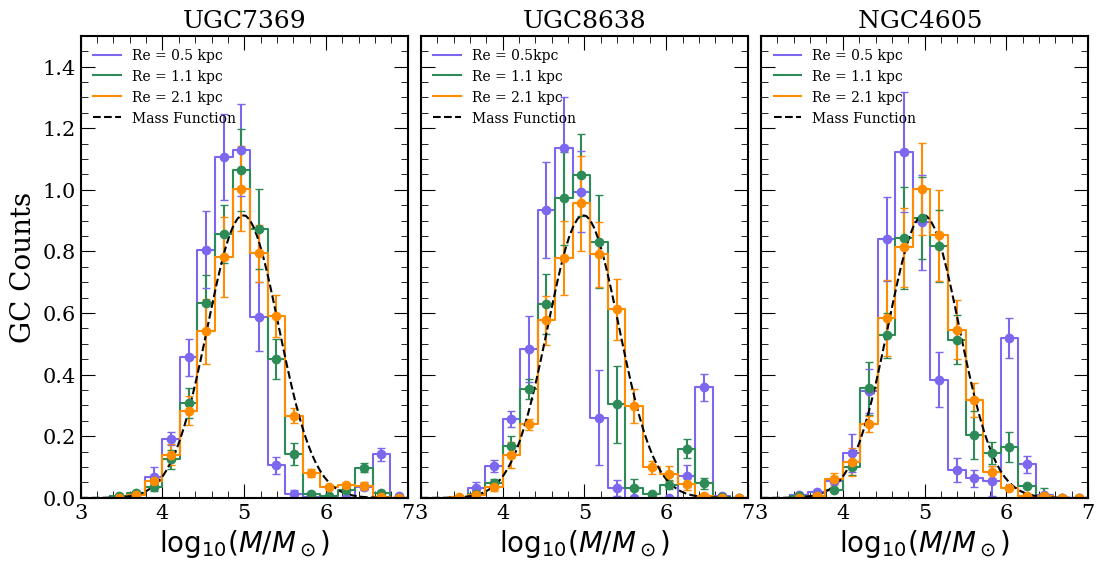

In [22]:
# GC Mass functions at the end of the sims)

n_values = [0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 1.9, 2.1]
UGC7369_masses = np.array([ 0.5270876 ,  0.15333488,  1.08466861,  0.23894274,  0.53477108,
        0.66067185,  2.74824974, 43.7230426 ,  0.25702028,  0.68325756,
        0.48945594,  0.78176033,  0.98889862,  0.70596634,  1.74467125,
        1.42423357,  1.17664156,  0.49028781,  0.71836984,  0.42620355,
        0.33863009])
NGC4605_masses = np.array([2.798490319888382, 0.17272820745171386, 0.9355246302950031, 2.806435077847868, 2.1865372126689695, 
 1.2407313733134462, 0.4584233399638007, 0.2937634439341443, 2.563561443019776, 0.21426819543381712, 
 0.664212064963621])
UGC8638_masses = np.array([0.3409560719297101, 1.5371520691156104, 29.201961429284346])


bin_edges = np.array([4-3*0.2142857142857144, 4-2*0.2142857142857144, 4-0.2142857142857144]\
                    +list(np.linspace(4, 7, 15))) #np.linspace(3, 7, 12)

fig, ax = plt.subplots(1, 3, figsize=(13, 6), sharey=True, sharex=True)
bin_centers = np.array([(bin_edges[i+1]+bin_edges[i])/2 for i in range(len(bin_edges)-1)])

# adjust the genfromtxt path to wherever you've been saving the outputs of the run_iterations bit
counts_n_NFW = []
R_e = 0.5
counts_n_NFW1 = []
counts_n_NFW2 = []
counts_n_NFW3 = []
for i in range(len(n_values)):
    n = n_values[i]
    data_NFW1 = np.genfromtxt('Sim_n_'+str(n)+'_ZoomNFW-1_20'+'_'+str(R_e)+'.txt', skip_header=2)
    masses_NFW1 = data_NFW1[:, 1]
    iterations_NFW1 = data_NFW1[:, 0]
    total_counts_NFW1 = np.zeros(bin_edges.shape[0]-1)
    array_of_counts_NFW1 = np.zeros([bin_edges.shape[0]-1, 50])
    total_masses_NFW1 = np.zeros(10)
    for j in range(10):
        counts_NFW_j1, _ = np.histogram(np.log10(masses_NFW1[iterations_NFW1==j]*1e5), bins=bin_edges)
        total_counts_NFW1 += counts_NFW_j1
        array_of_counts_NFW1[:, j] = counts_NFW_j1
        total_masses_NFW1[j] = sum(masses_NFW1[iterations_NFW1==j])
        continue

    average_counts_NFW1 = total_counts_NFW1/10
    std_counts_NFW1 = np.sqrt(np.std(array_of_counts_NFW1, axis=1)**2 /10)
    #print(np.average(total_masses_NFW))
    #print(np.std(total_masses_NFW))
    counts_n_NFW1.append(average_counts_NFW1)

    data_NFW2 = np.genfromtxt('Sim_n_'+str(n)+'_ZoomNFW-2_20'+'_'+str(R_e)+'.txt', skip_header=2)
    masses_NFW2 = data_NFW2[:, 1]
    iterations_NFW2 = data_NFW2[:, 0]
    total_counts_NFW2 = np.zeros(bin_edges.shape[0]-1)
    array_of_counts_NFW2 = np.zeros([bin_edges.shape[0]-1, 50])
    total_masses_NFW2 = np.zeros(10)
    for j in range(10):
        counts_NFW_j2, _ = np.histogram(np.log10(masses_NFW2[iterations_NFW2==j]*1e5), bins=bin_edges)
        total_counts_NFW2 += counts_NFW_j2
        array_of_counts_NFW2[:, j] = counts_NFW_j2
        total_masses_NFW2[j] = sum(masses_NFW2[iterations_NFW2==j])
        continue

    average_counts_NFW2 = total_counts_NFW2/10
    std_counts_NFW2 = np.sqrt(np.std(array_of_counts_NFW2, axis=1)**2 /10)
    #print(np.average(total_masses_NFW))
    #print(np.std(total_masses_NFW))
    counts_n_NFW2.append(average_counts_NFW2)
    
    data_NFW3 = np.genfromtxt('Sim_n_'+str(n)+'_ZoomNFW-3_20'+'_'+str(R_e)+'.txt', skip_header=2)
    masses_NFW3 = data_NFW3[:, 1]
    iterations_NFW3 = data_NFW3[:, 0]
    total_counts_NFW3 = np.zeros(bin_edges.shape[0]-1)
    array_of_counts_NFW3 = np.zeros([bin_edges.shape[0]-1, 50])
    total_masses_NFW3 = np.zeros(10)
    for j in range(10):
        counts_NFW_j3, _ = np.histogram(np.log10(masses_NFW3[iterations_NFW3==j]*1e5), bins=bin_edges)
        total_counts_NFW3 += counts_NFW_j3
        array_of_counts_NFW3[:, j] = counts_NFW_j3
        total_masses_NFW3[j] = sum(masses_NFW3[iterations_NFW3==j])
        continue

    average_counts_NFW3 = total_counts_NFW3/10
    std_counts_NFW3 = np.sqrt(np.std(array_of_counts_NFW3, axis=1)**2 /10)
    #print(np.average(total_masses_NFW))
    #print(np.std(total_masses_NFW))
    counts_n_NFW3.append(average_counts_NFW3)
average_counts_n_NFW1 = np.sum(counts_n_NFW1, axis=0)
average_counts_n_NFW2 = np.sum(counts_n_NFW2, axis=0)
average_counts_n_NFW3 = np.sum(counts_n_NFW3, axis=0)



#ax[0].bar(bin_edges[:-1], average_counts_n_NFW1/np.sum(average_counts_n_NFW1*0.2142857142857144), align='edge', width=0.2142857142857144, color='mistyrose', label='Re = 0.5')
ax[0].plot(bin_edges[:-1], average_counts_n_NFW1/np.sum(average_counts_n_NFW1*0.2142857142857144), drawstyle='steps-post', color='mediumslateblue', label='Re = 0.5 kpc')
ax[0].errorbar(bin_centers, average_counts_n_NFW1/np.sum(average_counts_n_NFW1*0.2142857142857144), yerr=std_counts_NFW1/np.sum(average_counts_NFW1*0.2142857142857144), ls='none', c='mediumslateblue', capsize=3, marker='o')

#ax[1].bar(bin_edges[:-1], average_counts_n_NFW2/np.sum(average_counts_n_NFW2*0.2142857142857144), align='edge', width=0.2142857142857144, color='mistyrose', label='Re = 0.5')
ax[1].plot(bin_edges[:-1], average_counts_n_NFW2/np.sum(average_counts_n_NFW2*0.2142857142857144), drawstyle='steps-post', color='mediumslateblue', label='Re = 0.5kpc')
ax[1].errorbar(bin_centers, average_counts_n_NFW2/np.sum(average_counts_n_NFW2*0.2142857142857144), yerr=std_counts_NFW2/np.sum(average_counts_NFW2*0.2142857142857144), ls='none', c='mediumslateblue', capsize=3, marker='o') 

#ax[2].bar(bin_edges[:-1], average_counts_n_NFW3/np.sum(average_counts_n_NFW3*0.2142857142857144), align='edge', width=0.2142857142857144, color='mistyrose', label='Re = 0.5')
ax[2].plot(bin_edges[:-1], average_counts_n_NFW3/np.sum(average_counts_n_NFW3*0.2142857142857144), drawstyle='steps-post', color='mediumslateblue', label='Re = 0.5 kpc ')
ax[2].errorbar(bin_centers, average_counts_n_NFW3/np.sum(average_counts_n_NFW3*0.2142857142857144), yerr=std_counts_NFW3/np.sum(average_counts_NFW3*0.2142857142857144), ls='none', c='mediumslateblue', capsize=3, marker='o') 

###########################################
#####################################

R_e = 1.1
counts_n_NFW1 = []
counts_n_NFW2 = []
counts_n_NFW3 = []
for i in range(len(n_values)):
    n = n_values[i]
    data_NFW1 = np.genfromtxt('Sim_n_'+str(n)+'_ZoomNFW-1_20'+'_'+str(R_e)+'.txt', skip_header=2)
    masses_NFW1 = data_NFW1[:, 1]
    iterations_NFW1 = data_NFW1[:, 0]
    total_counts_NFW1 = np.zeros(bin_edges.shape[0]-1)
    array_of_counts_NFW1 = np.zeros([bin_edges.shape[0]-1, 50])
    total_masses_NFW1 = np.zeros(10)
    for j in range(10):
        counts_NFW_j1, _ = np.histogram(np.log10(masses_NFW1[iterations_NFW1==j]*1e5), bins=bin_edges)
        total_counts_NFW1 += counts_NFW_j1
        array_of_counts_NFW1[:, j] = counts_NFW_j1
        total_masses_NFW1[j] = sum(masses_NFW1[iterations_NFW1==j])
        continue

    average_counts_NFW1 = total_counts_NFW1/10
    std_counts_NFW1 = np.sqrt(np.std(array_of_counts_NFW1, axis=1)**2 /10)
    #print(np.average(total_masses_NFW))
    #print(np.std(total_masses_NFW))
    counts_n_NFW1.append(average_counts_NFW1)

    data_NFW2 = np.genfromtxt('Sim_n_'+str(n)+'_ZoomNFW-2_20'+'_'+str(R_e)+'.txt', skip_header=2)
    masses_NFW2 = data_NFW2[:, 1]
    iterations_NFW2 = data_NFW2[:, 0]
    total_counts_NFW2 = np.zeros(bin_edges.shape[0]-1)
    array_of_counts_NFW2 = np.zeros([bin_edges.shape[0]-1, 50])
    total_masses_NFW2 = np.zeros(10)
    for j in range(10):
        counts_NFW_j2, _ = np.histogram(np.log10(masses_NFW2[iterations_NFW2==j]*1e5), bins=bin_edges)
        total_counts_NFW2 += counts_NFW_j2
        array_of_counts_NFW2[:, j] = counts_NFW_j2
        total_masses_NFW2[j] = sum(masses_NFW2[iterations_NFW2==j])
        continue

    average_counts_NFW2 = total_counts_NFW2/10
    std_counts_NFW2 = np.sqrt(np.std(array_of_counts_NFW2, axis=1)**2 /10)
    #print(np.average(total_masses_NFW))
    #print(np.std(total_masses_NFW))
    counts_n_NFW2.append(average_counts_NFW2)
    
    data_NFW3 = np.genfromtxt('Sim_n_'+str(n)+'_ZoomNFW-3_20'+'_'+str(R_e)+'.txt', skip_header=2)
    masses_NFW3 = data_NFW3[:, 1]
    iterations_NFW3 = data_NFW3[:, 0]
    total_counts_NFW3 = np.zeros(bin_edges.shape[0]-1)
    array_of_counts_NFW3 = np.zeros([bin_edges.shape[0]-1, 50])
    total_masses_NFW3 = np.zeros(10)
    for j in range(10):
        counts_NFW_j3, _ = np.histogram(np.log10(masses_NFW3[iterations_NFW3==j]*1e5), bins=bin_edges)
        total_counts_NFW3 += counts_NFW_j3
        array_of_counts_NFW3[:, j] = counts_NFW_j3
        total_masses_NFW3[j] = sum(masses_NFW3[iterations_NFW3==j])
        continue

    average_counts_NFW3 = total_counts_NFW3/10
    std_counts_NFW3 = np.sqrt(np.std(array_of_counts_NFW3, axis=1)**2 /10)
    #print(np.average(total_masses_NFW))
    #print(np.std(total_masses_NFW))
    counts_n_NFW3.append(average_counts_NFW3)
average_counts_n_NFW1 = np.sum(counts_n_NFW1, axis=0)
average_counts_n_NFW2 = np.sum(counts_n_NFW2, axis=0)
average_counts_n_NFW3 = np.sum(counts_n_NFW3, axis=0)



#ax[0].bar(bin_edges[:-1], average_counts_n_NFW1/np.sum(average_counts_n_NFW1*0.2142857142857144), align='edge', width=0.2142857142857144, color='lightblue', label='Re = 1.1')
ax[0].plot(bin_edges[:-1], average_counts_n_NFW1/np.sum(average_counts_n_NFW1*0.2142857142857144), drawstyle='steps-post', color='seagreen', label='Re = 1.1 kpc')
ax[0].errorbar(bin_centers, average_counts_n_NFW1/np.sum(average_counts_n_NFW1*0.2142857142857144), yerr=std_counts_NFW1/np.sum(average_counts_NFW1*0.2142857142857144), ls='none', c='seagreen', capsize=3, marker='o')

#ax[1].bar(bin_edges[:-1], average_counts_n_NFW2/np.sum(average_counts_n_NFW2*0.2142857142857144), align='edge', width=0.2142857142857144, color='lightblue', label='Re = 1.1')
ax[1].plot(bin_edges[:-1], average_counts_n_NFW2/np.sum(average_counts_n_NFW2*0.2142857142857144), drawstyle='steps-post', color='seagreen', label='Re = 1.1 kpc')
ax[1].errorbar(bin_centers, average_counts_n_NFW2/np.sum(average_counts_n_NFW2*0.2142857142857144), yerr=std_counts_NFW2/np.sum(average_counts_NFW2*0.2142857142857144), ls='none', c='seagreen', capsize=3, marker='o') 

#ax[2].bar(bin_edges[:-1], average_counts_n_NFW3/np.sum(average_counts_n_NFW3*0.2142857142857144), align='edge', width=0.2142857142857144, color='lightblue', label='Re = 1.1')
ax[2].plot(bin_edges[:-1], average_counts_n_NFW3/np.sum(average_counts_n_NFW3*0.2142857142857144), drawstyle='steps-post', color='seagreen', label='Re = 1.1 kpc')
ax[2].errorbar(bin_centers, average_counts_n_NFW3/np.sum(average_counts_n_NFW3*0.2142857142857144), yerr=std_counts_NFW3/np.sum(average_counts_NFW3*0.2142857142857144), ls='none', c='seagreen', capsize=3, marker='o') 


###########################################
#####################################

R_e = 2.1
counts_n_NFW1 = []
counts_n_NFW2 = []
counts_n_NFW3 = []
for i in range(len(n_values)):
    n = n_values[i]
    data_NFW1 = np.genfromtxt('Sim_n_'+str(n)+'_ZoomNFW-1_20'+'_'+str(R_e)+'.txt', skip_header=2)
    masses_NFW1 = data_NFW1[:, 1]
    iterations_NFW1 = data_NFW1[:, 0]
    total_counts_NFW1 = np.zeros(bin_edges.shape[0]-1)
    array_of_counts_NFW1 = np.zeros([bin_edges.shape[0]-1, 50])
    total_masses_NFW1 = np.zeros(10)
    for j in range(10):
        counts_NFW_j1, _ = np.histogram(np.log10(masses_NFW1[iterations_NFW1==j]*1e5), bins=bin_edges)
        total_counts_NFW1 += counts_NFW_j1
        array_of_counts_NFW1[:, j] = counts_NFW_j1
        total_masses_NFW1[j] = sum(masses_NFW1[iterations_NFW1==j])
        continue

    average_counts_NFW1 = total_counts_NFW1/10
    std_counts_NFW1 = np.sqrt(np.std(array_of_counts_NFW1, axis=1)**2 /10)
    #print(np.average(total_masses_NFW))
    #print(np.std(total_masses_NFW))
    counts_n_NFW1.append(average_counts_NFW1)

    data_NFW2 = np.genfromtxt('Sim_n_'+str(n)+'_ZoomNFW-2_20'+'_'+str(R_e)+'.txt', skip_header=2)
    masses_NFW2 = data_NFW2[:, 1]
    iterations_NFW2 = data_NFW2[:, 0]
    total_counts_NFW2 = np.zeros(bin_edges.shape[0]-1)
    array_of_counts_NFW2 = np.zeros([bin_edges.shape[0]-1, 50])
    total_masses_NFW2 = np.zeros(10)
    for j in range(10):
        counts_NFW_j2, _ = np.histogram(np.log10(masses_NFW2[iterations_NFW2==j]*1e5), bins=bin_edges)
        total_counts_NFW2 += counts_NFW_j2
        array_of_counts_NFW2[:, j] = counts_NFW_j2
        total_masses_NFW2[j] = sum(masses_NFW2[iterations_NFW2==j])
        continue

    average_counts_NFW2 = total_counts_NFW2/10
    std_counts_NFW2 = np.sqrt(np.std(array_of_counts_NFW2, axis=1)**2 /10)
    #print(np.average(total_masses_NFW))
    #print(np.std(total_masses_NFW))
    counts_n_NFW2.append(average_counts_NFW2)
    
    data_NFW3 = np.genfromtxt('Sim_n_'+str(n)+'_ZoomNFW-3_20'+'_'+str(R_e)+'.txt', skip_header=2)
    masses_NFW3 = data_NFW3[:, 1]
    iterations_NFW3 = data_NFW3[:, 0]
    total_counts_NFW3 = np.zeros(bin_edges.shape[0]-1)
    array_of_counts_NFW3 = np.zeros([bin_edges.shape[0]-1, 50])
    total_masses_NFW3 = np.zeros(10)
    for j in range(10):
        counts_NFW_j3, _ = np.histogram(np.log10(masses_NFW3[iterations_NFW3==j]*1e5), bins=bin_edges)
        total_counts_NFW3 += counts_NFW_j3
        array_of_counts_NFW3[:, j] = counts_NFW_j3
        total_masses_NFW3[j] = sum(masses_NFW3[iterations_NFW3==j])
        continue

    average_counts_NFW3 = total_counts_NFW3/10
    std_counts_NFW3 = np.sqrt(np.std(array_of_counts_NFW3, axis=1)**2 /10)
    #print(np.average(total_masses_NFW))
    #print(np.std(total_masses_NFW))
    counts_n_NFW3.append(average_counts_NFW3)
average_counts_n_NFW1 = np.sum(counts_n_NFW1, axis=0)
average_counts_n_NFW2 = np.sum(counts_n_NFW2, axis=0)
average_counts_n_NFW3 = np.sum(counts_n_NFW3, axis=0)



#ax[0].bar(bin_edges[:-1], average_counts_n_NFW1/np.sum(average_counts_n_NFW1*0.2142857142857144), align='edge', width=0.2142857142857144, color='honeydew', label='Re = 2.1')
ax[0].plot(bin_edges[:-1], average_counts_n_NFW1/np.sum(average_counts_n_NFW1*0.2142857142857144), drawstyle='steps-post', color='darkorange', label='Re = 2.1 kpc ')
ax[0].errorbar(bin_centers, average_counts_n_NFW1/np.sum(average_counts_n_NFW1*0.2142857142857144), yerr=std_counts_NFW1/np.sum(average_counts_NFW1*0.2142857142857144), ls='none', c='darkorange', capsize=3, marker='o')

#ax[1].bar(bin_edges[:-1], average_counts_n_NFW2/np.sum(average_counts_n_NFW2*0.2142857142857144), align='edge', width=0.2142857142857144, color='honeydew', label='Re = 2.1')
ax[1].plot(bin_edges[:-1], average_counts_n_NFW2/np.sum(average_counts_n_NFW2*0.2142857142857144), drawstyle='steps-post', color='darkorange', label='Re = 2.1 kpc')
ax[1].errorbar(bin_centers, average_counts_n_NFW2/np.sum(average_counts_n_NFW2*0.2142857142857144), yerr=std_counts_NFW2/np.sum(average_counts_NFW2*0.2142857142857144), ls='none', c='darkorange', capsize=3, marker='o') 

#ax[2].bar(bin_edges[:-1], average_counts_n_NFW3/np.sum(average_counts_n_NFW3*0.2142857142857144), align='edge', width=0.2142857142857144, color='honeydew', label='Re = 2.1')
ax[2].plot(bin_edges[:-1], average_counts_n_NFW3/np.sum(average_counts_n_NFW3*0.2142857142857144), drawstyle='steps-post', color='darkorange', label='Re = 2.1 kpc')
ax[2].errorbar(bin_centers, average_counts_n_NFW3/np.sum(average_counts_n_NFW3*0.2142857142857144), yerr=std_counts_NFW3/np.sum(average_counts_NFW3*0.2142857142857144), ls='none', c='darkorange', capsize=3, marker='o') 

###########################################
###########################################


bin_centers = np.array([(bin_edges[i+1]+bin_edges[i])/2 for i in range(len(bin_edges)-1)])

# NFW_bin_errors = np.zeros(bin_centers.shape[0])
# for i in range(len(bin_centers)):
#     if average_counts_NFW[i] > 0:
#         NFW_bin_errors[i] = np.sqrt(average_counts_NFW[i])

test_masses = np.linspace(3, 8, 100)
def mass_function(logmass):
    # currently using a NSC cut
    mean = 4.987311450993631 - 5
    variance = 0.18871641457327373
    return 1/np.sqrt(2*np.pi*variance) * np.exp(-(logmass-mean)**2 / (2*variance))
        

observed_color = 'darkviolet'
#ax[0].hist(np.log10(UGC7369_masses*1e5), bin_edges, linewidth=2, density=True, color=observed_color, label='Observed', histtype='step')
#ax[0].hist(np.log10(UGC8638_masses*1e5), bin_edges, linewidth=2, density=True, color=observed_color, label='Observed', histtype='step')

ax[0].plot(test_masses, mass_function(test_masses-5), 'k--', label='Mass Function')
ax[1].plot(test_masses, mass_function(test_masses-5), 'k--', label='Mass Function')
ax[2].plot(test_masses, mass_function(test_masses-5), 'k--', label='Mass Function')

ax[0].legend(loc='upper left', fontsize=10, frameon=False, ncol=1)
ax[1].legend(loc='upper left', fontsize=10, frameon=False, ncol=1)
ax[2].legend(loc='upper left', fontsize=10, frameon=False, ncol=1)
ax[0].set_xlabel(r'$\log_{10}(M/M_\odot)$', fontsize=20)
ax[1].set_xlabel(r'$\log_{10}(M/M_\odot)$', fontsize=20)
ax[2].set_xlabel(r'$\log_{10}(M/M_\odot)$', fontsize=20)
ax[0].set_ylabel(r'GC Counts', fontsize=20)
ax[0].set_ylim(0, 1.5)
ax[0].set_xlim(3, 7)
print ("Re =", R_e, ' n =', n)
fig.subplots_adjust(wspace=0.04)
ax[0].title.set_text('UGC7369') #+'n =[0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 1.9, 2.1]')
ax[1].title.set_text('UGC8638') #+' n =[0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 1.9, 2.1]')
ax[2].title.set_text('NGC4605 ') #+' n =[0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 1.9, 2.1]')
plt.savefig('gc_counts_re.png', dpi=300)
plt.show()

In [87]:
# Replicating Figure 8 of the paper (GC Mass functions at the end of the sims)

n = 1
R_e = 0.5

# adjust the genfromtxt path to wherever you've been saving the outputs of the run_iterations bit
# data_NFW = np.genfromtxt('Sim_n_'+str(n)+'_ZoomNFW-1_20'+'_'+str(R_e)+'.txt', skip_header=2)
# masses_NFW = data_NFW[:, 1]
# iterations_NFW = data_NFW[:, 0]

bin_edges = np.array([4-3*0.2142857142857144, 4-2*0.2142857142857144, 4-0.2142857142857144]\
                     +list(np.linspace(4, 7, 15)))#np.linspace(3, 7, 12)

total_counts_NFW = np.zeros(bin_edges.shape[0]-1)
array_of_counts_NFW = np.zeros([bin_edges.shape[0]-1, 10])
total_masses_NFW = np.zeros(10)

fig, ax = plt.subplots(1, 2, figsize=(13, 6), sharey=True, sharex=True)

bin_centers = np.array([(bin_edges[i+1]+bin_edges[i])/2 for i in range(len(bin_edges)-1)])

# for j in range(10):
#     counts_NFW_j, _ = np.histogram(np.log10(masses_NFW[iterations_NFW==j]*1e5), bins=bin_edges)
#     total_counts_NFW += counts_NFW_j
#     array_of_counts_NFW[:, j] = counts_NFW_j
#     total_masses_NFW[j] = sum(masses_NFW[iterations_NFW==j])
    
#     continue

# average_counts_NFW = total_counts_NFW/10
# std_counts_NFW = np.sqrt(np.std(array_of_counts_NFW, axis=1)**2 /10)
# print(np.average(total_masses_NFW))
# print(np.std(total_masses_NFW))


# #ax[0].bar(bin_edges[:-1], average_counts_NFW, align='edge', width=0.2142857142857144, color='lightsteelblue', label='NFW')
# ax[0].plot(bin_edges[:-1], average_counts_NFW, drawstyle='steps-post', color='red', label='NFW 1')

###########################
data_NFW = np.genfromtxt('Sim_n_'+str(n)+'_ZoomNFW-2_20'+'_'+str(R_e)+'.txt', skip_header=2)
masses_NFW = data_NFW[:, 1]
iterations_NFW = data_NFW[:, 0]

for j in range(10):
    counts_NFW_j, _ = np.histogram(np.log10(masses_NFW[iterations_NFW==j]*1e5), bins=bin_edges)
    total_counts_NFW += counts_NFW_j
    array_of_counts_NFW[:, j] = counts_NFW_j
    total_masses_NFW[j] = sum(masses_NFW[iterations_NFW==j])
    
    continue

average_counts_NFW = total_counts_NFW/10
std_counts_NFW = np.sqrt(np.std(array_of_counts_NFW, axis=1)**2 /10)
print(np.average(total_masses_NFW))
print(np.std(total_masses_NFW))


ax[0].bar(bin_edges[:-1], average_counts_NFW/np.sum(average_counts_NFW*0.2142857142857144), align='edge', width=0.2142857142857144, color='lightgreen', label='NFW')
ax[0].plot(bin_edges[:-1], average_counts_NFW/np.sum(average_counts_NFW*0.2142857142857144), drawstyle='steps-post', color='green', label='NFW 2')

##################################

bin_centers = np.array([(bin_edges[i+1]+bin_edges[i])/2 for i in range(len(bin_edges)-1)])

NFW_bin_errors = np.zeros(bin_centers.shape[0])
for i in range(len(bin_centers)):
    if average_counts_NFW[i] > 0:
        NFW_bin_errors[i] = np.sqrt(average_counts_NFW[i])

#ax[0].errorbar(bin_centers, average_counts_NFW, yerr=std_counts_NFW, ls='none', c='b', capsize=5, marker='o')

test_masses = np.linspace(3, 8, 100)
def mass_function(logmass):
    # currently using a NSC cut
    mean = 4.987311450993631 - 5
    variance = 0.18871641457327373
    return 1/np.sqrt(2*np.pi*variance) * np.exp(-(logmass-mean)**2 / (2*variance))

observed_color = 'darkviolet'
ax[0].hist(np.log10(UGC8638_masses*1e5), bin_edges, linewidth=2, density=True, color='red', label='Observed', histtype='step')
ax[1].hist(np.log10(UGC7369_masses*1e5), bin_edges, linewidth=2, density=True, color=observed_color, label='Observed', histtype='step')

#ax[0].hist(np.log10(UGC8638_masses*1e5), bin_edges, linewidth=2, density=True, color='pink', label='Observed', histtype='step')

ax[0].plot(test_masses, mass_function(test_masses-5), 'k--', label='Mass Function')
ax[1].plot(test_masses, mass_function(test_masses-5), 'k--', label='Mass Function')

ax[0].legend(loc='best', fontsize=20, frameon=False, ncol=2)
ax[1].legend(loc='best', fontsize=20, frameon=False, ncol=2)
ax[0].set_xlabel(r'$\log_{10}(M/M_\odot)$', fontsize=20)
ax[1].set_xlabel(r'$\log_{10}(M/M_\odot)$', fontsize=20)
ax[0].set_ylabel(r'GC Counts', fontsize=20)
ax[0].set_ylim(0, 2)
ax[0].set_xlim(3, 7)

fig.subplots_adjust(wspace=0.04)
plt.show()

OSError: Sim_n_1_ZoomNFW-2_20_0.5.txt not found.

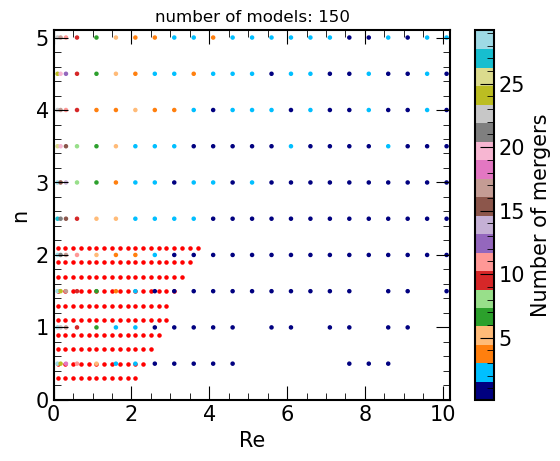

In [12]:
def grid_test(bl, br, tl, tr, R_spacing, n_spacing):
    # takes as input (R_e, n) of the bottom left (bl), bottom right (br), top left (tl), top right (tr)
    # corners of a trapezoidal grid, along with R and n spacings between gridpoints, and then
    # returns a list of pairs of (R_e, n) for the grid
    n_values = np.arange(bl[1], tl[1]+n_spacing, n_spacing)
    pairs_of_values = []
    for n_value in n_values:
        R_right_edge = br[0] + (n_value-bl[1])*(tr[0]-br[0])/(tl[1]-bl[1])
        #print(R_right_edge)
        R_values = np.arange(bl[0], R_right_edge+R_spacing, R_spacing)
        #print(R_values)
        for R_value in R_values:
            pairs_of_values.append(np.array([R_value, n_value]))
    return pairs_of_values
def plot_grid(grid_test_output):
    # takes the output of grid_test as an input and plots all the new points in red, old points in light grey    
    Re_values = []
    n_values = []
    for i in range(len(grid_test_output)):
        Re_values.append(grid_test_output[i][0])
        n_values.append(grid_test_output[i][1])
    plt.scatter(Re_values, n_values, color='r', s=5)
    old_Re = np.arange(0.1, 10.2, 0.5)
    old_n = np.arange(0.5, 5.5, 0.5)
    Re_mesh, n_mesh = np.meshgrid(old_Re, old_n)
    #plt.scatter (no_merger_Re, no_merger_n, color = 'red', s=5)
    plt.scatter (merger_Re, merger_n, c=merger_num, cmap = custom_cmap, s=5)
    plt.xlabel('Re')
    plt.ylabel('n')
    colorbar = plt.colorbar()
    colorbar.set_label('Number of mergers')

    plt.xlim(0, 10.2)
    plt.ylim(0, 5.1)
    plt.title('number of models: '+str(len(grid_test_output)))
    plt.show()
plot_grid(grid_test([0.1, 0.3], [2, 0.3], [0.1, 2], [3.5, 2], 0.2, 0.2))

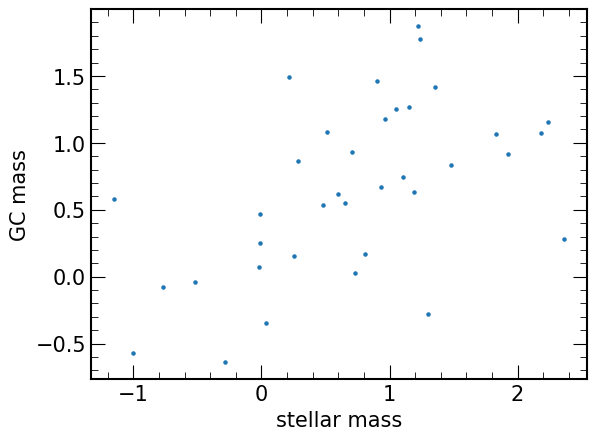

In [48]:
mass_data = np.genfromtxt('Mass_data.txt', skip_header=1)
stellar_mass = mass_data[:, 1]
total_gc_mass = mass_data[:, 2]
name = mass_data[:, 0]


plt.scatter (np.log10(stellar_mass), np.log10(total_gc_mass), s=5)
plt.xlabel('stellar mass')
plt.ylabel('GC mass')

#for i, txt in enumerate(name):
    #plt.annotate(txt, (stellar_mass[i], total_gc_mass[i]))
    
plt.show()

In [99]:
def halo_mass_calc (M_star):
    alpha = 1.74
    M1 = 10**(12.5) #solar masses
    log_epsilon = -1.70
    M = M1 * 10**(1/alpha * (np.log10(M_star/M1) - log_epsilon))
    return M

M200 = halo_mass_calc(1.63*10**7)
print('M200=', M200/10**11)
h = 0.7
print('M200/h =', M200/h/10**11)
c = 7

rho_crit = 0.00136 # critical density with h = 0.7 in units of 10^5/kpc^3
# NFW scale radius from M200 and c
r0_N = 1/c * (3*M200 /10**5/(4*np.pi*200*rho_crit))**(1/3)
# NFW scale density from c
rho0_N = rho_crit * 200/3 * (c**3 / (np.log(1+c) - c/(1+c)))

print ('r0 =', r0_N, 'rho0 =', rho0_N)

M200= 0.2741819451203692
M200/h = 0.3916884930290989
r0 = 8.885783752821396 rho0 = 25.81998842658094


In [4]:
import os

#n_values = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1]
n_values = [0.3]
output_time_values = np.arange(0, 21, 1)

#n_values = [0.3]
#output_time_values = [5]

# Absolute path of a file

for i in range(len(n_values)):
    n = n_values[i]
    for j in range (len(output_time_values)):
        output_time = output_time_values[j]
        old_name = 'Sim_n_'+str(n)+'_'+'ZoomNFW-2'+'_'+str(output_time)+'_'+'2.0999999999999996'+'.txt'
        new_name = 'Sim_n_'+str(n)+'_'+'ZoomNFW-2'+'_'+str(output_time)+'_'+'2.1'+'.txt'
        if os.path.exists(old_name):
            ## Renaming the file
            os.rename(old_name, new_name)
            print ('file does exist')
        else:
            print('File does not exist!')



file does exist
file does exist
file does exist
file does exist
file does exist
file does exist
file does exist
file does exist
file does exist
file does exist
file does exist
file does exist
file does exist
file does exist
file does exist
file does exist
file does exist
file does exist
file does exist
file does exist
file does exist


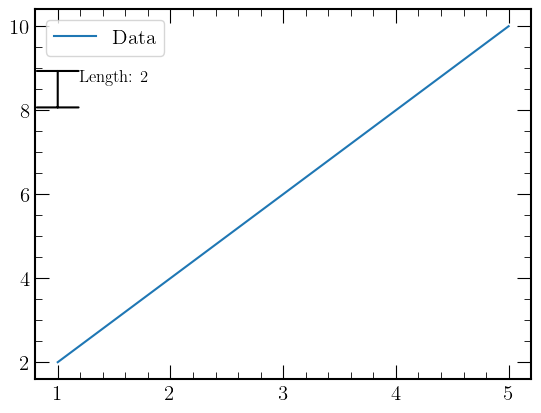

In [234]:
import matplotlib.pyplot as plt

# Your plot data and settings
x_data = [1, 2, 3, 4, 5]
y_data = [2, 4, 6, 8, 10]

# Create the plot
plt.plot(x_data, y_data, label='Data')

# Add a line with a specific length (x_length) starting from (x_start, y_start)
x_start, y_start = 1, 8
y_length = 1
plt.annotate('', xy=(x_start, y_start+y_length), xytext=(x_start, y_start),
             arrowprops=dict(arrowstyle='|-|', color='black', lw=1.5))

# Add a label for the line
plt.annotate('Length: {}'.format(x_length), xy=(x_start+0.5, y_start+y_length/2), xytext=(0, 5),
             textcoords='offset points', ha='center', fontsize=12)

# Add your legend if needed
plt.legend()

plt.show()


In [339]:
r= 0.7
rho_0=25.82
r_0= 8.89
print(tau_NFW(1, r, vcirc_NFW(r, rho_0, r_0), rho_0, r_0))

15.237129477404954
